# **NoMoreChurn – Telco Risk Intelligence**

## __Import Libraries and Dataset__

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

#import tkinter
from sklearn.model_selection import cross_val_score
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load DataSet
df = pd.read_excel("Telecom Churn Rate Dataset.xlsx")


In [3]:
# First 5 Rows of the DataSet
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


## __Features Description__
- customerID: Customer ID
- genderCustomer: gender (female, male)
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- PartnerWhether: the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- numAdminTickets: The number of Admin Ticket
- numTechTickets: The number of Tech Ticket
- Churn: Whether the customer churned or not (Yes or No)

In [4]:
# Check no of Rows and Columns
df.shape


(7043, 23)

In [5]:
# Information Of DataSet
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## __Data Preprocessing__

### _1. Check "TotalCharges" column as it's DataType is Object, which must be Float_

In [6]:
#pd.to_numeric(df['a'], errors='coerce') converts values to numbers and replaces non-numeric values with NaN.
# .notnull() returns True for numeric values.
# ~ inverts the condition to select non-numeric values.

df[~pd.to_numeric(df["TotalCharges"], errors='coerce').notnull()] 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


In [7]:
# Drop Rows with non-numeric values
df=df.drop(df.index[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]])


In [8]:
# Change "TotalCharges" DataType to Float
df['TotalCharges']=df['TotalCharges'].astype(float)


### _2. Drop Duplicates_

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,0,0,Yes


In [11]:
df.shape

(7032, 23)

### _3. Create Categorical Columns and Numerical Columns_

In [12]:
# Manual feature classification using unique value count
# To avoid Discreate values in Numerical Columns

columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) >=6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1]
numeric_columns.remove('customerID')    # unnecessory for EDA

print("Categorical Columns: \n", categoric_columns)
print("\nNumerical Columns: \n", numeric_columns)

Categorical Columns: 
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical Columns: 
 ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']


### _4. Label Encoding_

In [13]:
# Label Encoding is used to convert categorical labels into numeric values. 
# This step is just for EDA purposes; OneHotEncoding will be applied later for model training.

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df1 = df.copy()

df1[categoric_columns] = df1[categoric_columns].apply(label.fit_transform)
df1[['Churn']] = df1[['Churn']].apply(label.fit_transform)

### _5. Statistics of Numerical Data_

In [14]:
df1[numeric_columns].describe()

,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.514932,0.420222
std,24.545260,30.085974,2266.771362,1.273921,1.250984
min,1.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000,0.000000
75%,55.000000,89.862500,3794.737500,0.000000,0.000000
max,72.000000,118.750000,8684.800000,5.000000,9.000000


## __Data Imbalance__

In [15]:
# Data Imbalance occurs when the classes in your target variable (labels) are not represented equally. This is common in classification problems.
# Cause of Data Imbalance, the model can learn to always predict the majority class (e.g., always predict "No fraud") and still get high accuracy
# But it will fail to detect the important minority class ("Fraud").

In [16]:
#Defining colors for the plots
palette = ["crimson", "pink", "midnightblue", "paleturquoise"]
palette2 = ["pelegreen", "springgreen", "mediumseagreen", "darkcyan"]

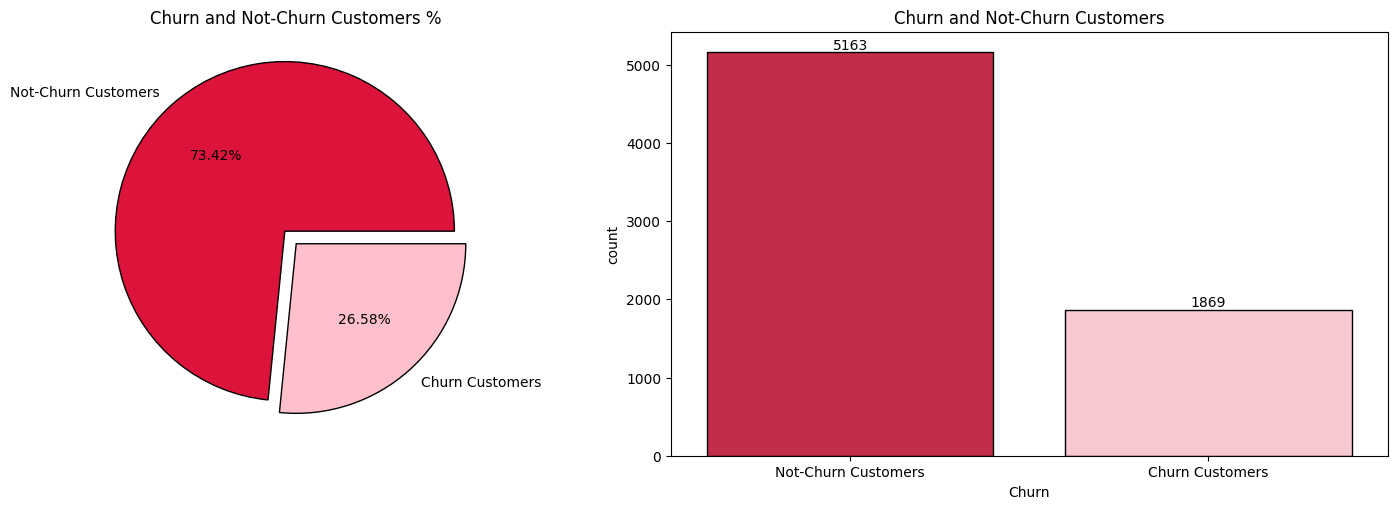

In [17]:
# Get value counts for 'Churn' column
l1 = list(df1['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

# Create subplots
fig = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.pie(
    pie_values,
    labels=['Not-Churn Customers', 'Churn Customers'],
    autopct='%1.2f%%',
    explode=(0.1, 0),
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Churn and Not-Churn Customers %')
plt.tight_layout()

# --- Bar Plot ---
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df1, x='Churn', palette=palette, edgecolor='black')

# Add labels on bars
for i in ax.containers:
    ax.bar_label(i)

# Replace class values with readable labels
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])
plt.title('Churn and Not-Churn Customers')

# Show plots
plt.show()


## __Feature Distribution__

### _1. Numerical Features Distibution_

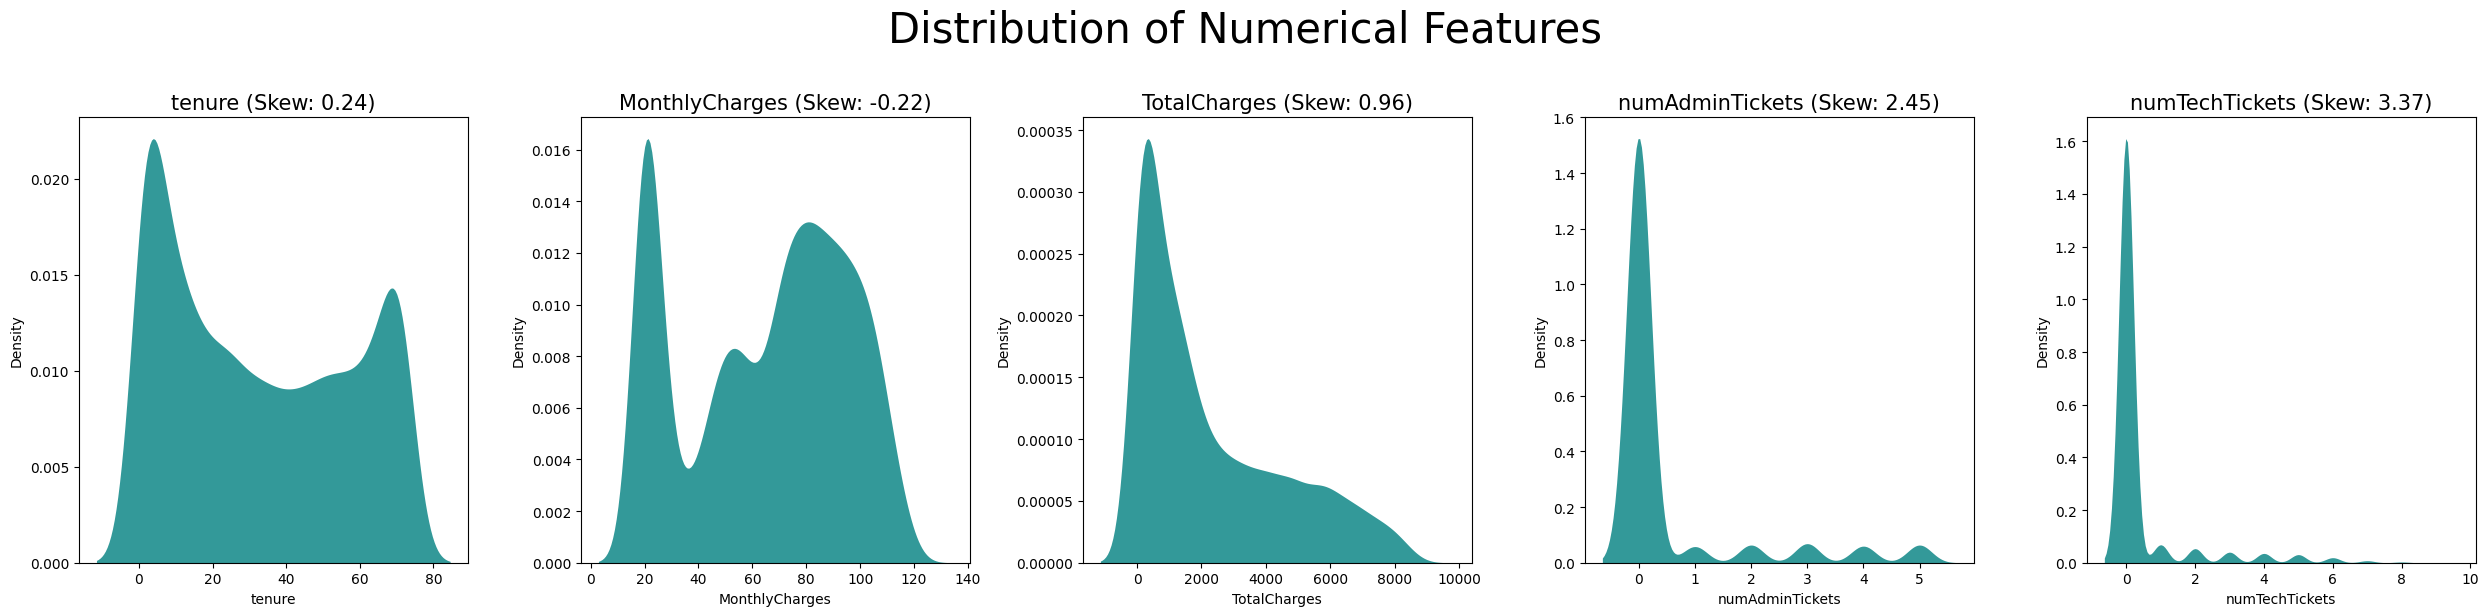

In [18]:
# Distribution plot function for multiple numeric features
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    # Create a subplot grid based on specified rows and columns; size adjusts dynamically
    fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 6 * rows))
    
    # Set the main title for the full figure; pushed up slightly for better spacing
    fig.suptitle(suptitle, y=1.02, fontsize=30)
    
    # Flatten the 2D array of Axes to a 1D array for easy looping
    axs = axs.flatten()

    # Loop through each column to plot its distribution
    for i, col in enumerate(columns_list):
        # Plot the KDE (Kernel Density Estimate) of the column data, removing NaNs
        sns.kdeplot(data=dataset[col].dropna(), ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        
        # Calculate skewness of the column and round it to 2 decimal places
        skew_val = round(dataset[col].skew(skipna=True), 2)
        
        # Set the subplot title with the column name and skewness value
        axs[i].set_title(f'{col} (Skew: {skew_val})', fontsize=15)
    
    # Adjust layout to avoid overlap of plots, titles, and labels
    plt.tight_layout()
    
    # Display the final figure
    plt.show()

# Function Calling
dist_custom(dataset=df1, columns_list=numeric_columns, rows=1, cols=5, suptitle='Distribution of Numerical Features')



### _2. Numerical Features Boxplot_

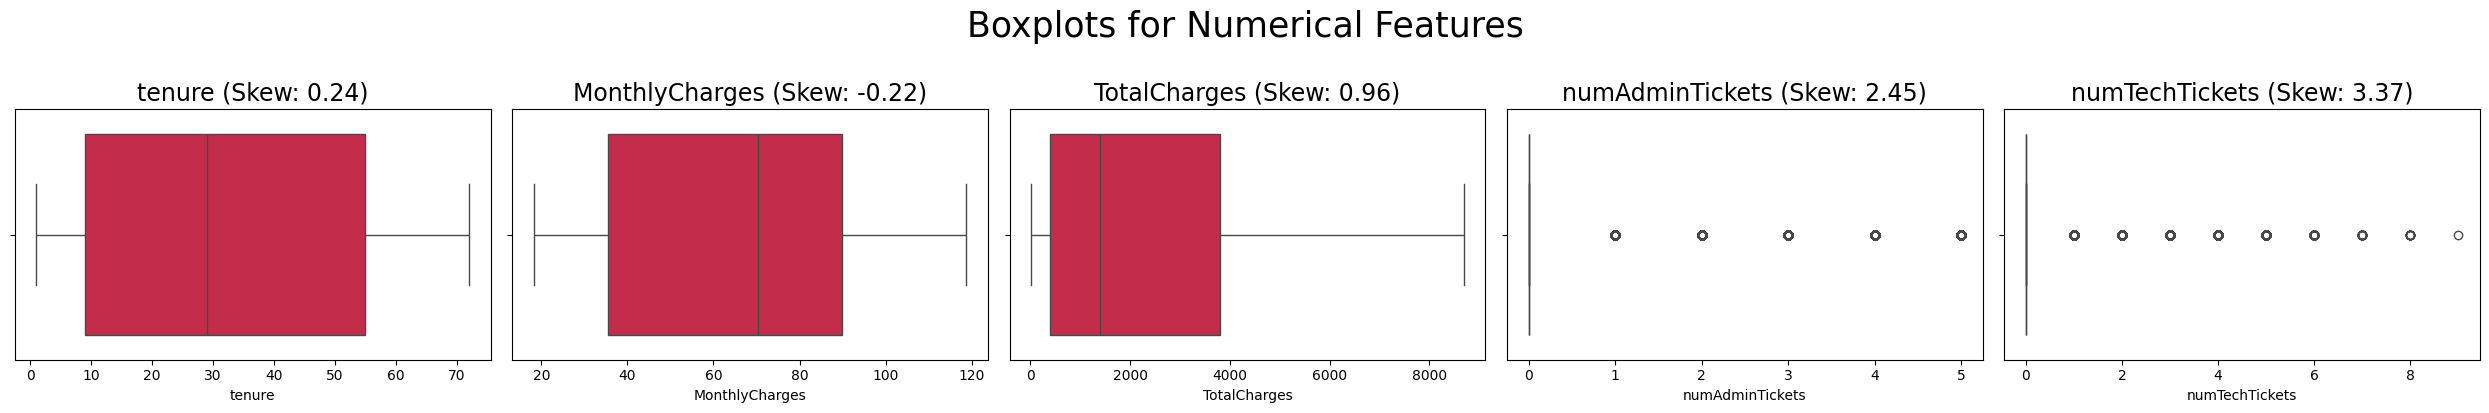

In [19]:
# Custom function to draw boxplots for multiple numeric features
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    # Create subplots with shared y-axis and dynamic figure size
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(5 * cols, 4 * rows))
    
    # Set the main title above all plots
    fig.suptitle(suptitle, y=1.02, fontsize=25)
    
    # Flatten the axs array to make it 1D for easy iteration
    axs = axs.flatten()

    # Loop over each column and plot a boxplot
    for i, col in enumerate(columns_list):
        sns.boxplot(data=dataset[col].dropna(), ax=axs[i], orient='h', palette=palette)
        
        # Calculate skewness of the column
        skew_val = round(dataset[col].skew(skipna=True), 2)
        
        # Set plot title including skewness info
        axs[i].set_title(f'{col} (Skew: {skew_val})', fontsize=17)
        
        # Optional: remove grid for a cleaner look
        axs[i].grid(False)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Call the function to plot boxplots
boxplots_custom(dataset=df1, columns_list=numeric_columns, rows=1, cols=5, suptitle='Boxplots for Numerical Features')


## __Numerical Features by Churn and not Churn__

### _1. Monthly Charges and Total Charges_

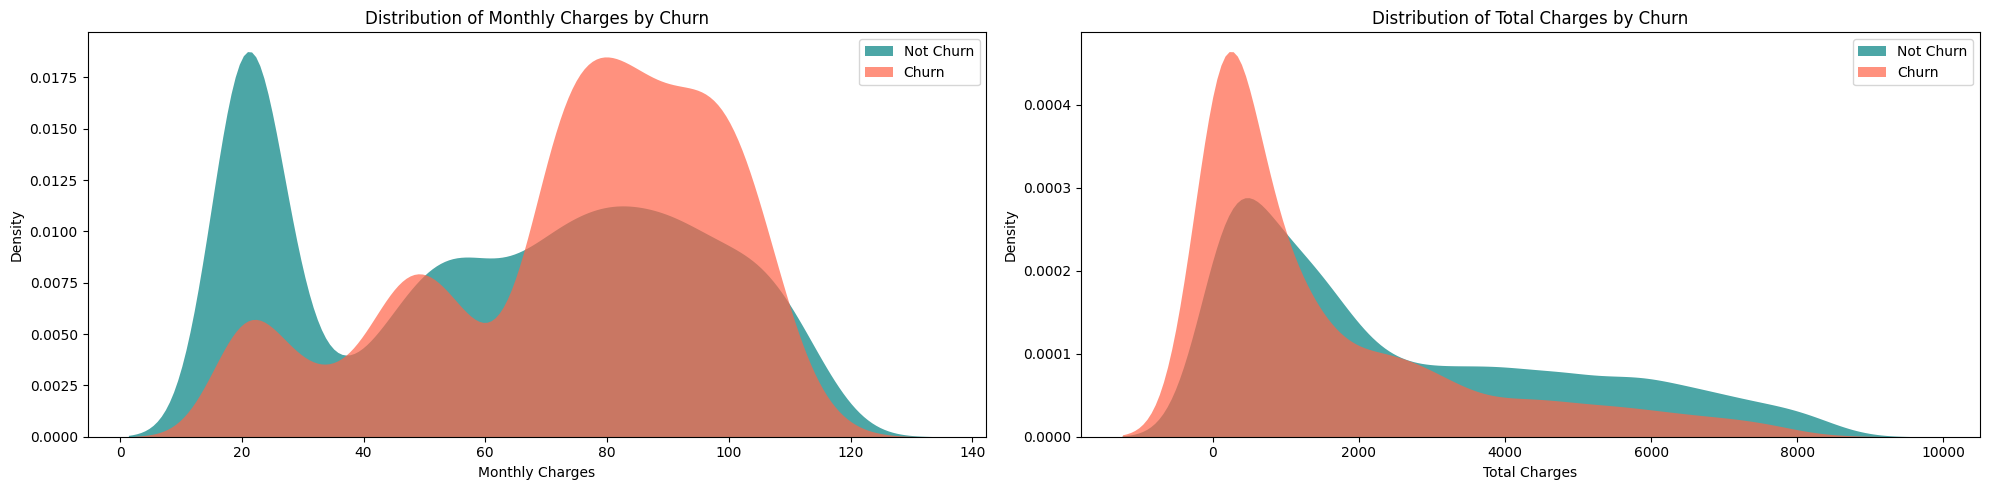

In [20]:
# Set up the figure with 1 row and 2 columns, and custom figure size
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# ================== Subplot 1: Monthly Charges Distribution ==================
plt.subplot(1, 2, 1)  # Select first subplot position

# Plot KDE for customers who did NOT churn
sns.kdeplot(df1.MonthlyCharges[df1["Churn"] == 0], color='#008080', fill=True, alpha=0.7, linewidth=0)

# Plot KDE for customers who DID churn
sns.kdeplot(df1.MonthlyCharges[df1["Churn"] == 1], color='#FF6347', fill=True, alpha=0.7, linewidth=0)

# Customize plot
plt.legend(["Not Churn", "Churn"], loc='upper right')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Distribution of Monthly Charges by Churn')

# ================== Subplot 2: Total Charges Distribution ==================
plt.subplot(1, 2, 2)  # Select second subplot position

# Plot KDE for customers who did NOT churn
sns.kdeplot(df1.TotalCharges[df1["Churn"] == 0], color='#008080', fill=True, alpha=0.7, linewidth=0)

# Plot KDE for customers who DID churn
sns.kdeplot(df1.TotalCharges[df1["Churn"] == 1], color='#FF6347', fill=True, alpha=0.7, linewidth=0)

# Customize plot
plt.legend(["Not Churn", "Churn"], loc='upper right')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Distribution of Total Charges by Churn')

# Show the plots
plt.tight_layout()
plt.show()


### _2. Tenure_

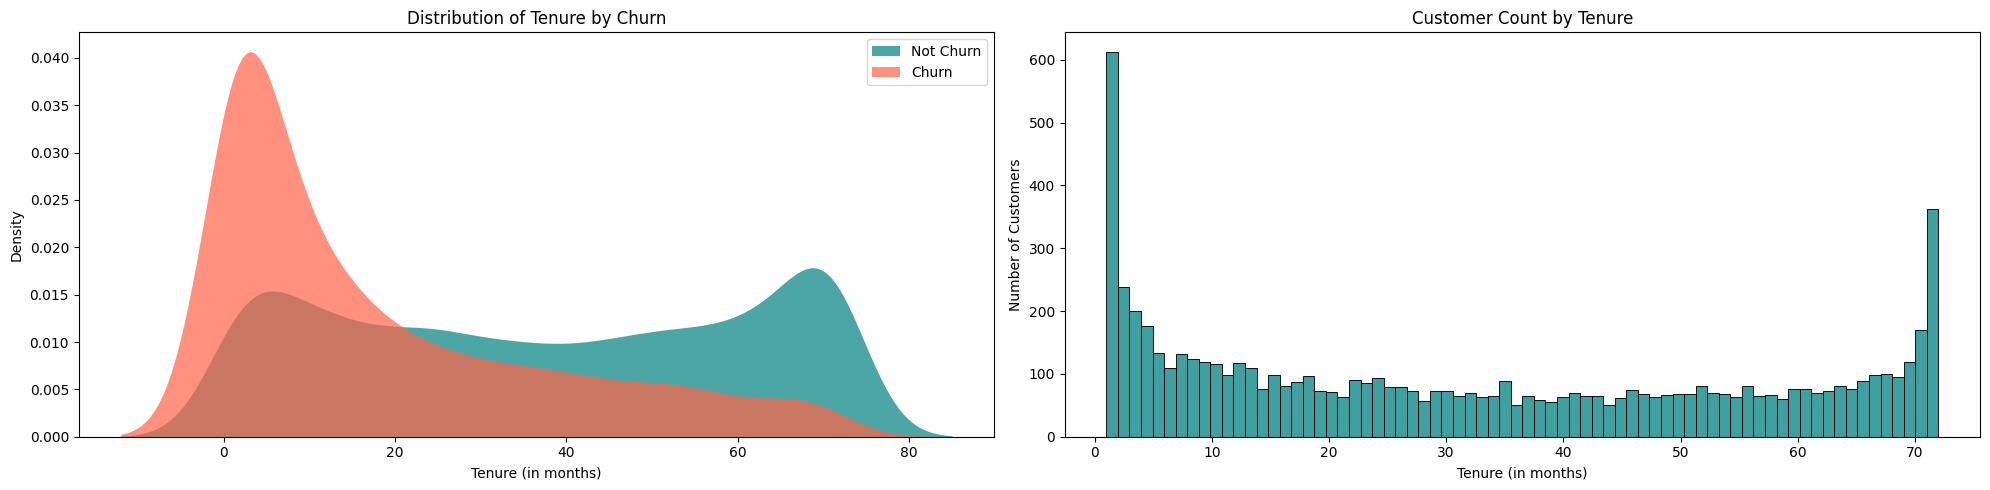

In [21]:
# Create a figure with 1 row and 2 columns, define the figure size
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# ===================== Subplot 1: KDE Plot for Tenure by Churn =====================
plt.subplot(1, 2, 1)  # First subplot

# KDE plot for customers who did NOT churn
sns.kdeplot(df1.tenure[df1["Churn"] == 0], color='#008080', fill=True, alpha=0.7, linewidth=0)

# KDE plot for customers who DID churn
sns.kdeplot(df1.tenure[df1["Churn"] == 1], color='#FF6347', fill=True, alpha=0.7, linewidth=0)

# Add legend and labels
plt.legend(["Not Churn", "Churn"], loc='upper right')
plt.xlabel('Tenure (in months)')
plt.ylabel('Density')
plt.title('Distribution of Tenure by Churn')

# ===================== Subplot 2: Histogram of Overall Tenure =====================
plt.subplot(1, 2, 2)  # Second subplot

# Histogram showing total customer count for each tenure month
sns.histplot(df1["tenure"], bins=72, kde=False, color='#008080')

# Add labels and title
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Tenure')

# Improve layout and display the plots
plt.tight_layout()
plt.show()


### _3. Contract_

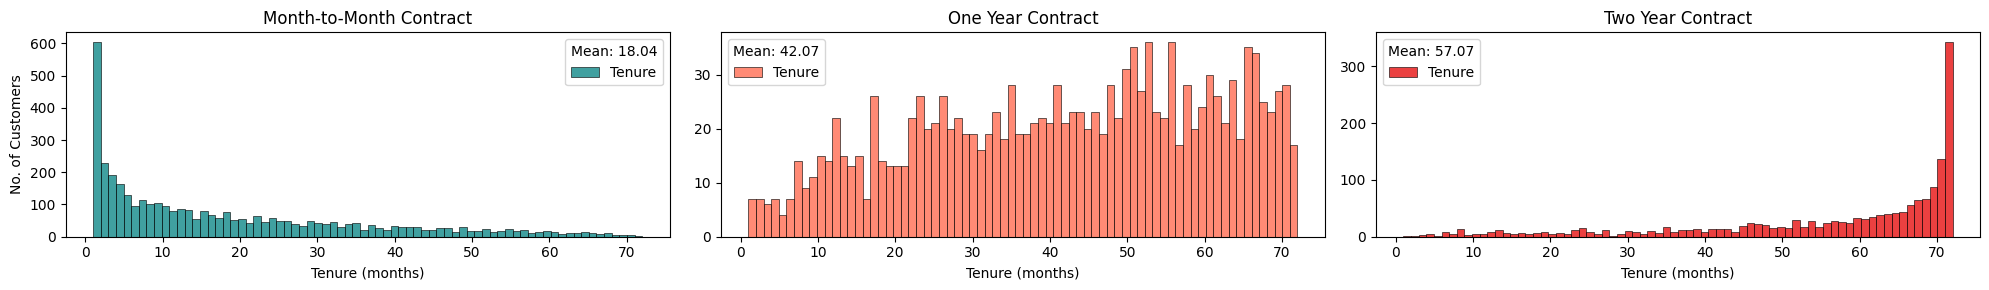

In [22]:
# ========== Step 1: Calculate Mean Tenure for Each Contract Type ==========
# Contract Types: 0 = Month-to-Month, 1 = One Year, 2 = Two Year
# Calculates the average tenure of (month-to-month, one-year, two-year) contract customers and rounds it to 2 decimal places.
# df1[df1['Contract'] == 0]['tenure']: Filters the dataset to only include customers with a month-to-month contract and selects their tenure column.

month_mean = round(df1[df1['Contract'] == 0]['tenure'].mean(), 2)
year_mean = round(df1[df1['Contract'] == 1]['tenure'].mean(), 2)
two_year_mean = round(df1[df1['Contract'] == 2]['tenure'].mean(), 2)

# ========== Step 2: Setup Figure with 3 Subplots ==========
fig = plt.subplots(nrows=1, ncols=3, figsize=(20, 3))

# ========== Subplot 1: Month-to-Month Contract ==========
plt.subplot(1, 3, 1)
sns.histplot(df1[df1['Contract'] == 0]['tenure'], bins=72, color='#008080')
plt.title('Month-to-Month Contract')
plt.xlabel('Tenure (months)')
plt.ylabel('No. of Customers')
plt.legend(['Tenure'], title=f'Mean: {month_mean}', loc='upper right')

# ========== Subplot 2: One Year Contract ==========
plt.subplot(1, 3, 2)
sns.histplot(df1[df1['Contract'] == 1]['tenure'], bins=72, color='#FF6347')
plt.title('One Year Contract')
plt.xlabel('Tenure (months)')
plt.ylabel('')  # Clear y-label for neatness
plt.legend(['Tenure'], title=f'Mean: {year_mean}', loc='upper left')

# ========== Subplot 3: Two Year Contract ==========
plt.subplot(1, 3, 3)
sns.histplot(df1[df1['Contract'] == 2]['tenure'], bins=72, color='#E50000')
plt.title('Two Year Contract')
plt.xlabel('Tenure (months)')
plt.ylabel('')
plt.legend(['Tenure'], title=f'Mean: {two_year_mean}', loc='upper left')

# ========== Final Step: Display the plots ==========
plt.tight_layout()
plt.show()


### _4. Scatter plot by Total Charge, Monthly Charge and Tenure_

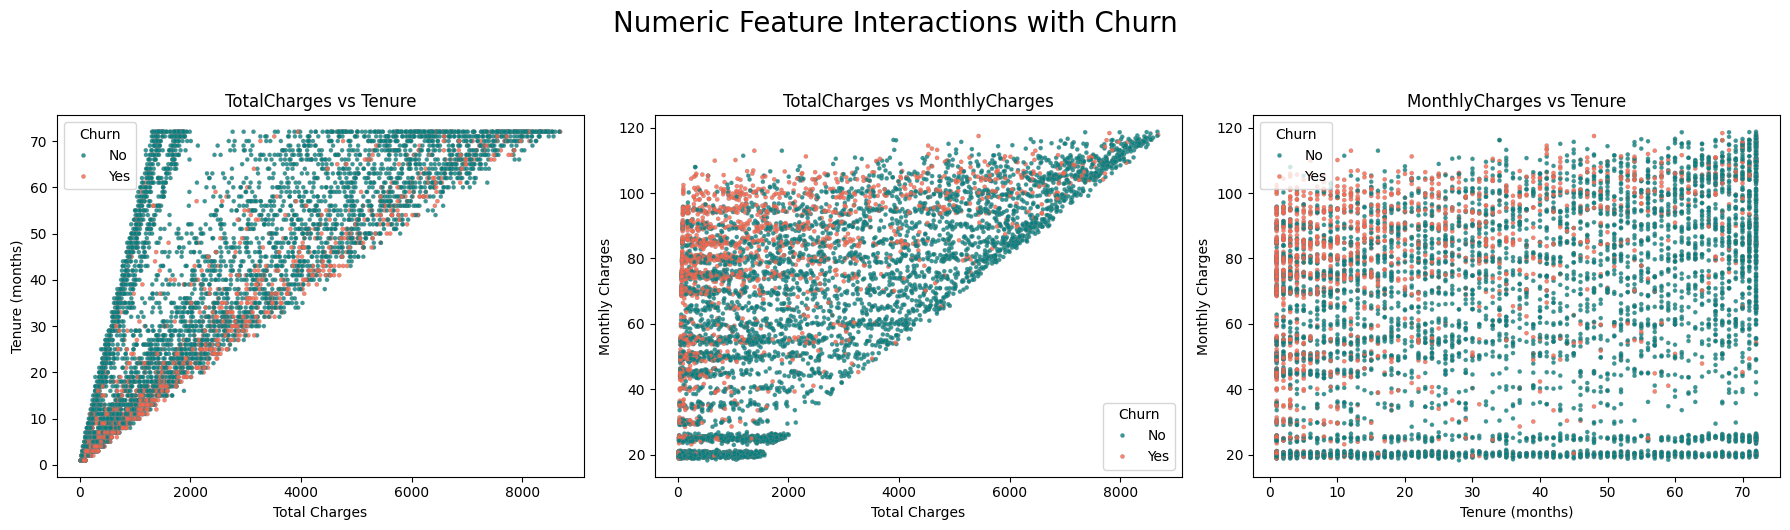

In [23]:
# Define a color palette for Churn: [No Churn, Churn]
palette2 = ['#008080', '#FF6347']

# Step 1: Create the figure canvas with a specified size
fig = plt.figure(figsize=(18, 5))

# ========== Subplot 1: TotalCharges vs Tenure ==========
plt.subplot(1, 3, 1)
sns.scatterplot(
    data=df,
    x='TotalCharges',
    y='tenure',
    hue='Churn',
    palette=palette2,
    edgecolor='grey',
    alpha=0.8,
    s=9  # point size
)
plt.title('TotalCharges vs Tenure')
plt.xlabel('Total Charges')
plt.ylabel('Tenure (months)')

# ========== Subplot 2: TotalCharges vs MonthlyCharges ==========
plt.subplot(1, 3, 2)
sns.scatterplot(
    data=df,
    x='TotalCharges',
    y='MonthlyCharges',
    hue='Churn',
    palette=palette2,
    edgecolor='grey',
    alpha=0.8,
    s=9
)
plt.title('TotalCharges vs MonthlyCharges')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')

# ========== Subplot 3: MonthlyCharges vs Tenure ==========
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    palette=palette2,
    edgecolor='grey',
    alpha=0.8,
    s=9
)
plt.title('MonthlyCharges vs Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')

# Step 2: Add a common title for the figure
fig.suptitle('Numeric Feature Interactions with Churn', fontsize=20, y=1.05)

# Step 3: Adjust layout for spacing and display
plt.tight_layout()
plt.show()


### _5. NumAdminTickets and NumTechTickets_

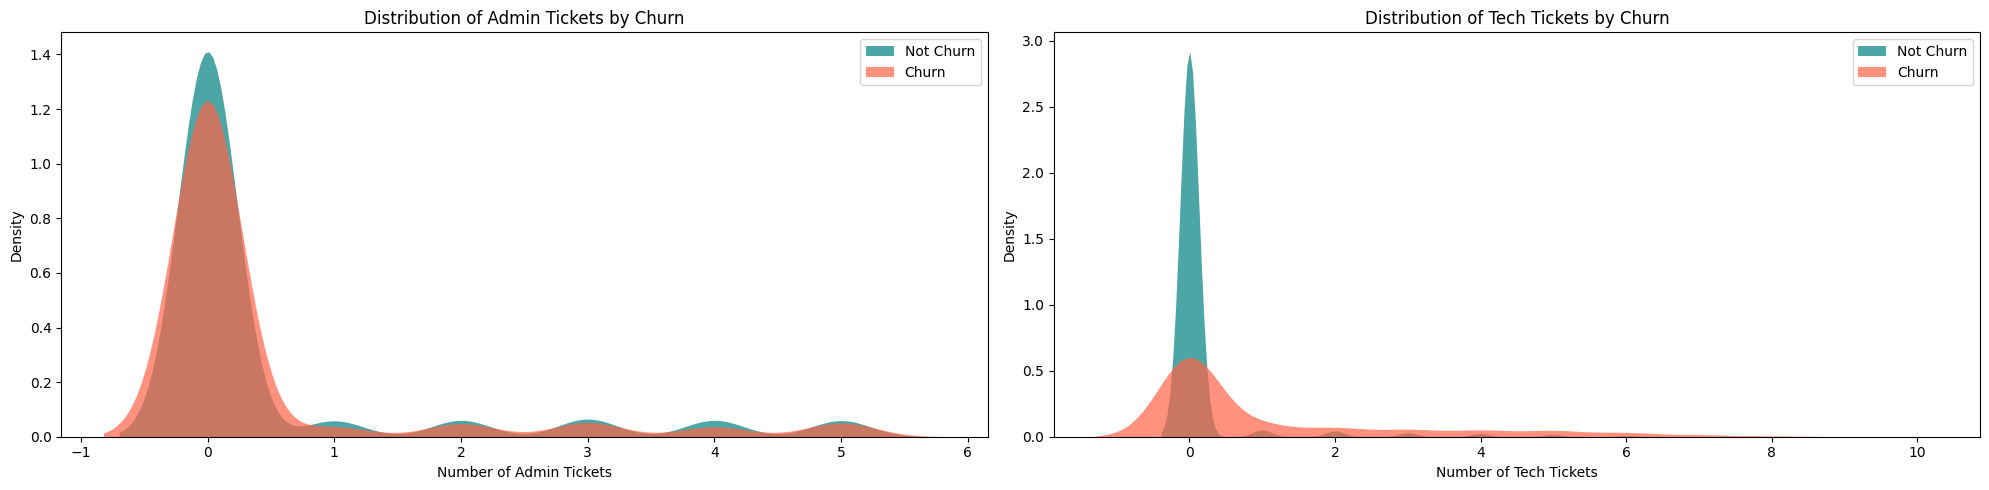

In [24]:
# Step 1: Create a figure with 2 subplots in one row
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# ========== Subplot 1: NumAdminTickets Distribution ==========
plt.subplot(1, 2, 1)
# KDE plot for customers who did not churn
sns.kdeplot(
    df1[df1["Churn"] == 0]["numAdminTickets"],
    color='#008080',
    fill=True,
    alpha=0.7,
    linewidth=0
)
# KDE plot for customers who churned
sns.kdeplot(
    df1[df1["Churn"] == 1]["numAdminTickets"],
    color='#FF6347',
    fill=True,
    alpha=0.7,
    linewidth=0
)
plt.legend(["Not Churn", "Churn"], loc='upper right')
plt.xlabel('Number of Admin Tickets')
plt.ylabel('Density')
plt.title('Distribution of Admin Tickets by Churn')

# ========== Subplot 2: NumTechTickets Distribution ==========
plt.subplot(1, 2, 2)
# KDE plot for customers who did not churn
sns.kdeplot(
    df1[df1["Churn"] == 0]["numTechTickets"],
    color='#008080',
    fill=True,
    alpha=0.7,
    linewidth=0
)
# KDE plot for customers who churned
sns.kdeplot(
    df1[df1["Churn"] == 1]["numTechTickets"],
    color='#FF6347',
    fill=True,
    alpha=0.7,
    linewidth=0
)
plt.legend(["Not Churn", "Churn"], loc='upper right')
plt.xlabel('Number of Tech Tickets')
plt.ylabel('Density')
plt.title('Distribution of Tech Tickets by Churn')

# Step 2: Show the plots
plt.tight_layout()
plt.show()


## __Categorical Features by Churn and not Churn__

### _1. Customer information by Churn and not Churn_

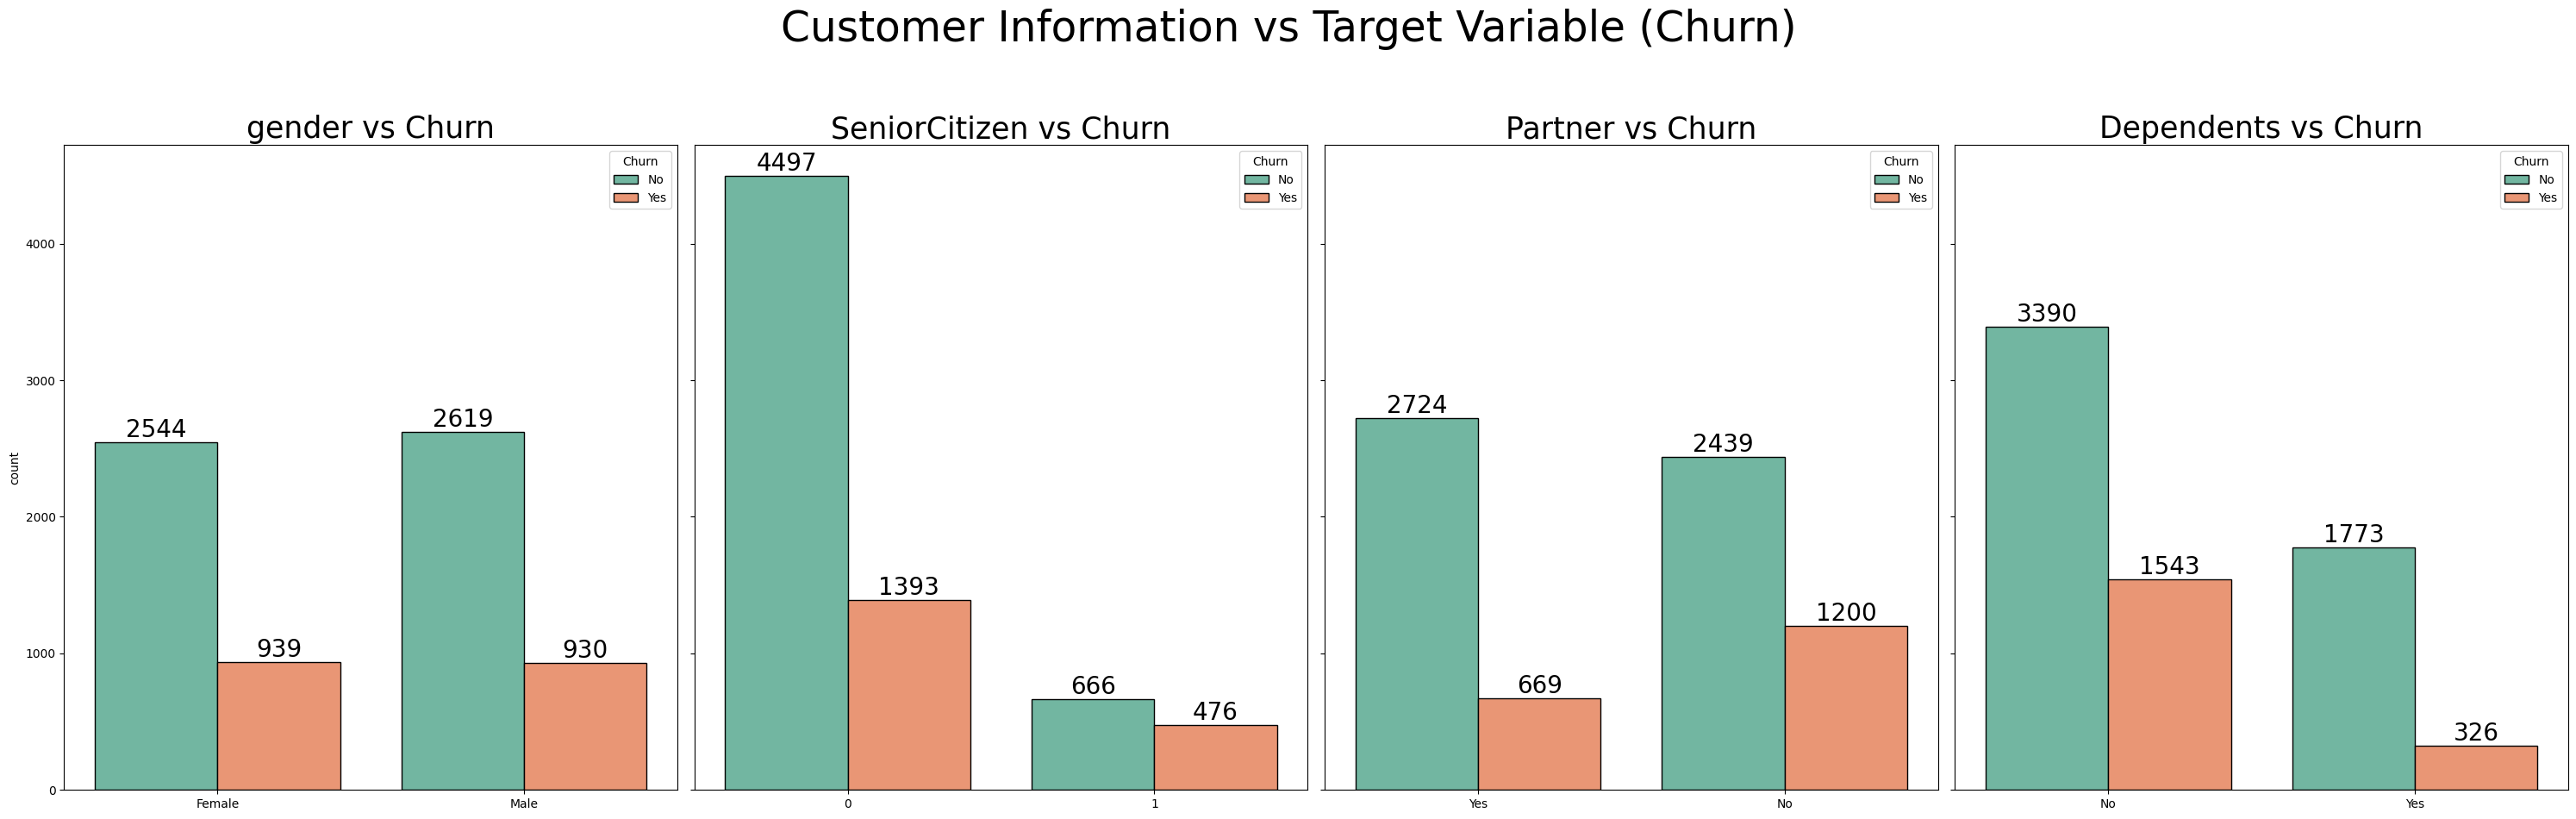

In [25]:
# List of columns to plot, targeting categorical customer features
list1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
hue = "Churn"  # Target variable (Churn status)
figsize = (30, 9)  # Define the figure size

# Function to generate customized countplots for multiple categorical variables
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    # Step 1: Create subplots layout with specified number of rows and columns
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle, y=1.05, size=35)  # Title for the entire figure
    axs = axs.flatten()  # Flatten axes to make indexing easier

    # Step 2: Iterate through the columns list to create individual countplots
    for i, data in enumerate(columns_list):
        # Create a countplot for each feature in the columns list
        ax = sns.countplot(
            data=dataset,
            ax=axs[i],
            x=columns_list[i],  # x-axis represents the current feature
            hue=hue,  # Color bars by Churn (target variable)
            palette=palette,  # Use the specified color palette
            edgecolor='black'  # Outline bars for better distinction
        )
        # Set the title for each subplot
        axs[i].set_title(f'{data} vs {hue}', size=25)
        
        # Step 3: Add bar labels to countplot for better readability
        for container in ax.containers:
            ax.bar_label(container, size=20)  # Add counts on top of bars
        
        axs[i].set_xlabel('')  # Hide x-labels for clarity, already implied by the title

    # Step 4: Adjust layout to avoid overlap of labels and titles
    plt.tight_layout()

# Step 5: Call the function with required parameters
countplots_custom(
    dataset=df,                       # df = before label encoding data
    columns_list=list1, 
    rows=1, 
    cols=4, 
    figsize=figsize, 
    suptitle='Customer Information vs Target Variable (Churn)', 
    hue=hue, 
    palette='Set2'  # You can choose a different palette here (Set2 is a good choice for categorical data)
)
# Display the plots
plt.show()


In [26]:
# Calculating the percentage distribution of 'gender' for customers who have churned
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
# Calculate the percentage of 'Male' and 'Female' customers who have churned
pie1_values1 = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]


# Calculating the percentage distribution of 'SeniorCitizen' for customers who have churned
senior = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
# Calculate the percentage of senior citizens and non-senior citizens who have churned
pie1_values2 = [senior[0] / sum(senior) * 100, senior[1] / sum(senior) * 100]


# Calculating the percentage distribution of 'Partner' for customers who have churned
partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
# Calculate the percentage of customers with and without a partner who have churned
pie1_values3 = [partner[0] / sum(partner) * 100, partner[1] / sum(partner) * 100]


# Calculating the percentage distribution of 'Dependents' for customers who have churned
dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
# Calculate the percentage of customers with and without dependents who have churned
pie1_values4 = [dependents[0] / sum(dependents) * 100, dependents[1] / sum(dependents) * 100]


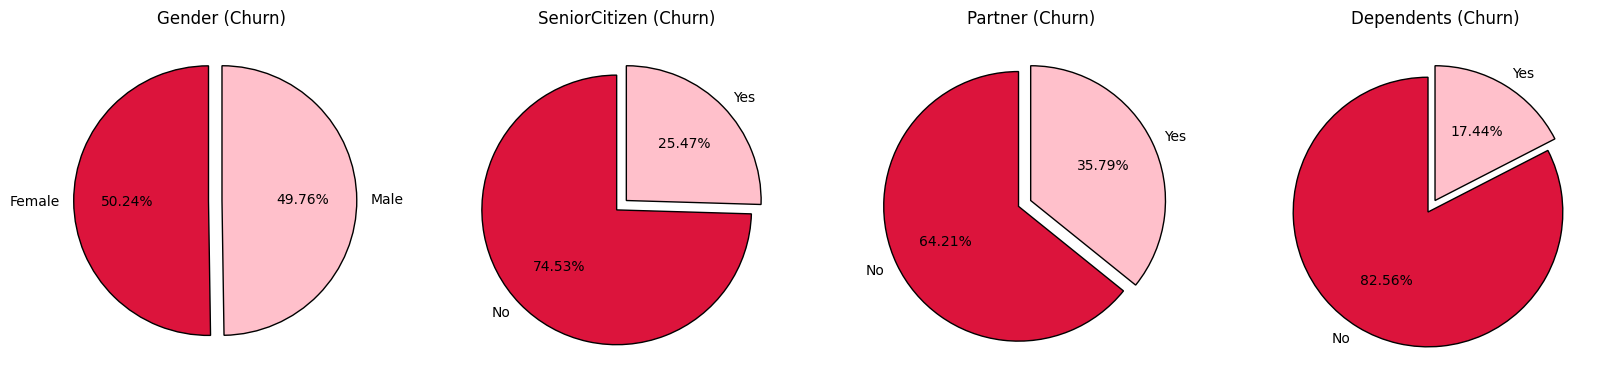

In [27]:
# Set up a subplot grid with 1 row and 4 columns for pie charts
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))

# Plotting the pie chart for 'Gender' distribution for churned customers
plt.subplot(1, 4, 1)
plt.pie(pie1_values1, labels=['Female', 'Male'],  # Labels for each slice
        autopct='%1.2f%%',  # Display percentage on the chart
        startangle=90,  # Start angle to rotate the pie chart
        explode=(0.1, 0),  # Slightly explode the first slice (Female)
        colors=palette,  # Color palette for the chart
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})  # Set edge properties
plt.title('Gender (Churn)')  # Title of the plot

# Plotting the pie chart for 'SeniorCitizen' distribution for churned customers
plt.subplot(1, 4, 2)
plt.pie(pie1_values2, labels=['No', 'Yes'],  # Labels for each slice
        autopct='%1.2f%%',  # Display percentage on the chart
        startangle=90,  # Start angle to rotate the pie chart
        explode=(0.1, 0),  # Slightly explode the first slice (No)
        colors=palette,  # Color palette for the chart
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})  # Set edge properties
plt.title('SeniorCitizen (Churn)')  # Title of the plot

# Plotting the pie chart for 'Partner' distribution for churned customers
plt.subplot(1, 4, 3)
plt.pie(pie1_values3, labels=['No', 'Yes'],  # Labels for each slice
        autopct='%1.2f%%',  # Display percentage on the chart
        startangle=90,  # Start angle to rotate the pie chart
        explode=(0.1, 0),  # Slightly explode the first slice (No)
        colors=palette,  # Color palette for the chart
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})  # Set edge properties
plt.title('Partner (Churn)')  # Title of the plot

# Plotting the pie chart for 'Dependents' distribution for churned customers
plt.subplot(1, 4, 4)
plt.pie(pie1_values4, labels=['No', 'Yes'],  # Labels for each slice
        autopct='%1.2f%%',  # Display percentage on the chart
        startangle=90,  # Start angle to rotate the pie chart
        explode=(0.1, 0),  # Slightly explode the first slice (No)
        colors=palette,  # Color palette for the chart
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})  # Set edge properties
plt.title('Dependents (Churn)')  # Title of the plot

# Display the final plot with all the pie charts
plt.show()


### _2. Provided services by Churn and not Churn_

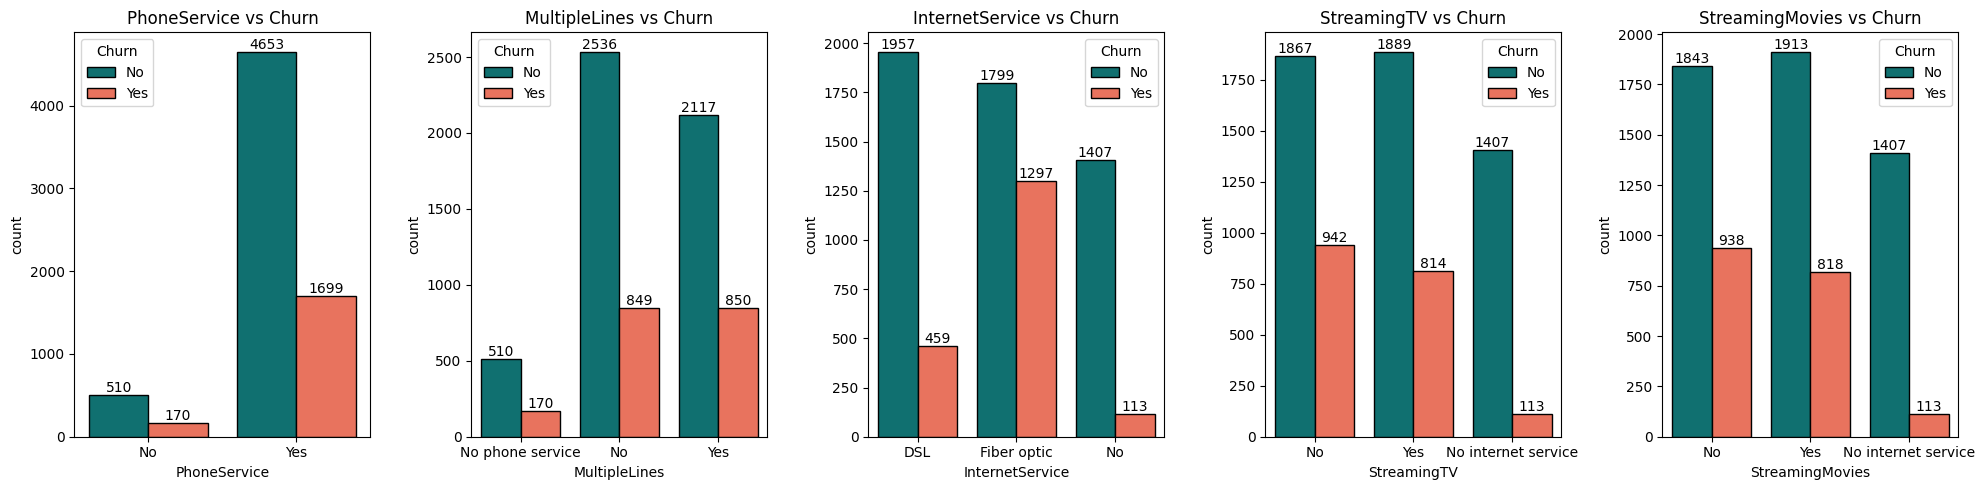

In [28]:
# List of categorical service-related features to plot against Churn
list2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']

# Create a new figure to hold all subplots
fig = plt.figure(figsize=(20, 5))  # Set the overall figure size

# Looping through each feature in list2 to create subplots
for idx, feature in enumerate(list2, start=1):
    plt.subplot(1, 5, idx)  # Arrange plots in a 2x3 (2 rows, 3 columns) grid (6 slots, we are using 5)
    
    # Create a countplot for each feature vs Churn
    ax = sns.countplot(data=df, x=feature, hue="Churn", palette=palette2, edgecolor='black')
    
    # Set the legend for the plot
    if feature in ['PhoneService', 'MultipleLines']:
        ax.legend(loc='upper left', title='Churn')
    else:
        ax.legend(loc='upper right', title='Churn')
    
    # Add data labels (counts) on top of each bar
    for container in ax.containers:
        ax.bar_label(container)
    
    # Set a dynamic title for each subplot
    plt.title(f'{feature} vs Churn')

# Adjust subplot spacing to prevent overlapping
plt.tight_layout()

# Display the final plot
plt.show()


In [29]:
# Calculating churned customer percentages for service-related features

# 1. PhoneService (binary: Yes/No)
phone_counts = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
pie2_values1 = [
    phone_counts.get(0, 0) / phone_counts.sum() * 100,  # No PhoneService
    phone_counts.get(1, 0) / phone_counts.sum() * 100   # Has PhoneService
]

# 2. MultipleLines (three categories: No Phone Service, No, Yes)
multiple_lines_counts = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
pie2_values2 = [
    multiple_lines_counts.get(0, 0) / multiple_lines_counts.sum() * 100,  # No phone service
    multiple_lines_counts.get(1, 0) / multiple_lines_counts.sum() * 100,  # No
    multiple_lines_counts.get(2, 0) / multiple_lines_counts.sum() * 100   # Yes
]

# 3. InternetService (three categories: DSL, Fiber Optic, No)
internet_service_counts = df1[df1['Churn'] == 1]['InternetService'].value_counts()
pie2_values3 = [
    internet_service_counts.get(0, 0) / internet_service_counts.sum() * 100,  # DSL
    internet_service_counts.get(1, 0) / internet_service_counts.sum() * 100,  # Fiber optic
    internet_service_counts.get(2, 0) / internet_service_counts.sum() * 100   # No
]

# 4. StreamingTV (three categories: No Internet Service, No, Yes)
streaming_tv_counts = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
pie2_values4 = [
    streaming_tv_counts.get(0, 0) / streaming_tv_counts.sum() * 100,  # No internet service
    streaming_tv_counts.get(1, 0) / streaming_tv_counts.sum() * 100,  # No
    streaming_tv_counts.get(2, 0) / streaming_tv_counts.sum() * 100   # Yes
]

# 5. StreamingMovies (three categories: No Internet Service, No, Yes)
streaming_movies_counts = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
pie2_values5 = [
    streaming_movies_counts.get(0, 0) / streaming_movies_counts.sum() * 100,  # No internet service
    streaming_movies_counts.get(1, 0) / streaming_movies_counts.sum() * 100,  # No
    streaming_movies_counts.get(2, 0) / streaming_movies_counts.sum() * 100   # Yes
]


In [30]:
# Checking how 'StreamingTV' (any column) column looks before and after encoding for defining plot labels

# 1. Before Encoding
# Filter original DataFrame where Churn = 'Yes' and check the distribution of StreamingTV
before_encode = df[df['Churn'] == 'Yes']['StreamingTV'].value_counts()

# 2. After Encoding
# Filter encoded DataFrame where Churn = 1 (encoded 'Yes' → 1) and check the distribution of StreamingTV
after_encode = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()

# 3. Display the results
print("StreamingTV column distribution:")
print("\nBefore Encoding:\n", before_encode)
print("\nAfter Encoding:\n", after_encode)


StreamingTV column distribution:

Before Encoding:
 StreamingTV
No                     942
Yes                    814
No internet service    113
Name: count, dtype: int64

After Encoding:
 StreamingTV
0    942
2    814
1    113
Name: count, dtype: int64


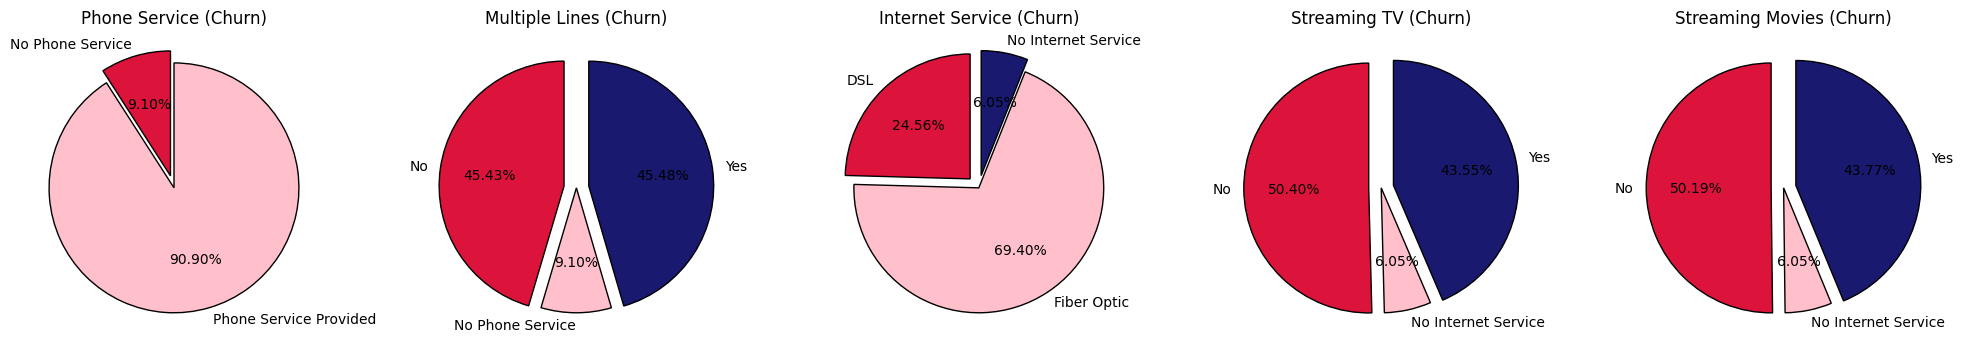

In [31]:
# Create a figure with a specified size for better visualization
fig = plt.figure(figsize=(20, 18))

# ========== Subplot 1: Phone Service ==========
plt.subplot(1, 5, 1)  # Place it in a 2-row, 3-column grid (1st position)
plt.pie(
    pie2_values1, 
    labels=['No Phone Service', 'Phone Service Provided'],  # Category labels
    autopct='%1.2f%%',  # Display percentage values on the chart
    startangle=90,  # Rotate the chart for better alignment
    explode=(0.1, 0),  # Slightly separate the "No Phone Service" slice for emphasis
    colors=palette,  # Use predefined color palette
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}  # Style for better visibility
)
plt.title('Phone Service (Churn)')  # Set title for the pie chart

# ========== Subplot 2: Multiple Lines ==========
plt.subplot(1, 5, 2)  # 2nd position
plt.pie(
    pie2_values2, 
    labels=['No', 'No Phone Service', 'Yes'],  # Categories for multiple lines
    autopct='%1.2f%%',
    startangle=90,
    explode=(0.1, 0, 0.1),  # Separate "No" and "Yes" slices for better distinction
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Multiple Lines (Churn)')

# ========== Subplot 3: Internet Service ==========
plt.subplot(1, 5, 3)  # 3rd position
plt.pie(
    pie2_values3, 
    labels=['DSL', 'Fiber Optic', 'No Internet Service'],  # Internet types
    autopct='%1.2f%%',
    startangle=90,
    explode=(0.1, 0, 0.1),
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Internet Service (Churn)')

# ========== Subplot 4: Streaming TV ==========
plt.subplot(1, 5, 4)  # 4th position
plt.pie(
    pie2_values4, 
    labels=['No', 'No Internet Service', 'Yes'],  # StreamingTV categories
    autopct='%1.2f%%',
    startangle=90,
    explode=(0.1, 0, 0.1),
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Streaming TV (Churn)')

# ========== Subplot 5: Streaming Movies ==========
plt.subplot(1, 5, 5)  # 5th position
plt.pie(
    pie2_values5, 
    labels=['No', 'No Internet Service', 'Yes'],  # StreamingMovies categories
    autopct='%1.2f%%',
    startangle=90,
    explode=(0.1, 0, 0.1),
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Streaming Movies (Churn)')

# Adjust layout to prevent overlapping of charts and titles
plt.tight_layout()

# Display the final pie chart visualization
plt.show()


### _3. Support services by Churn and not Churn_

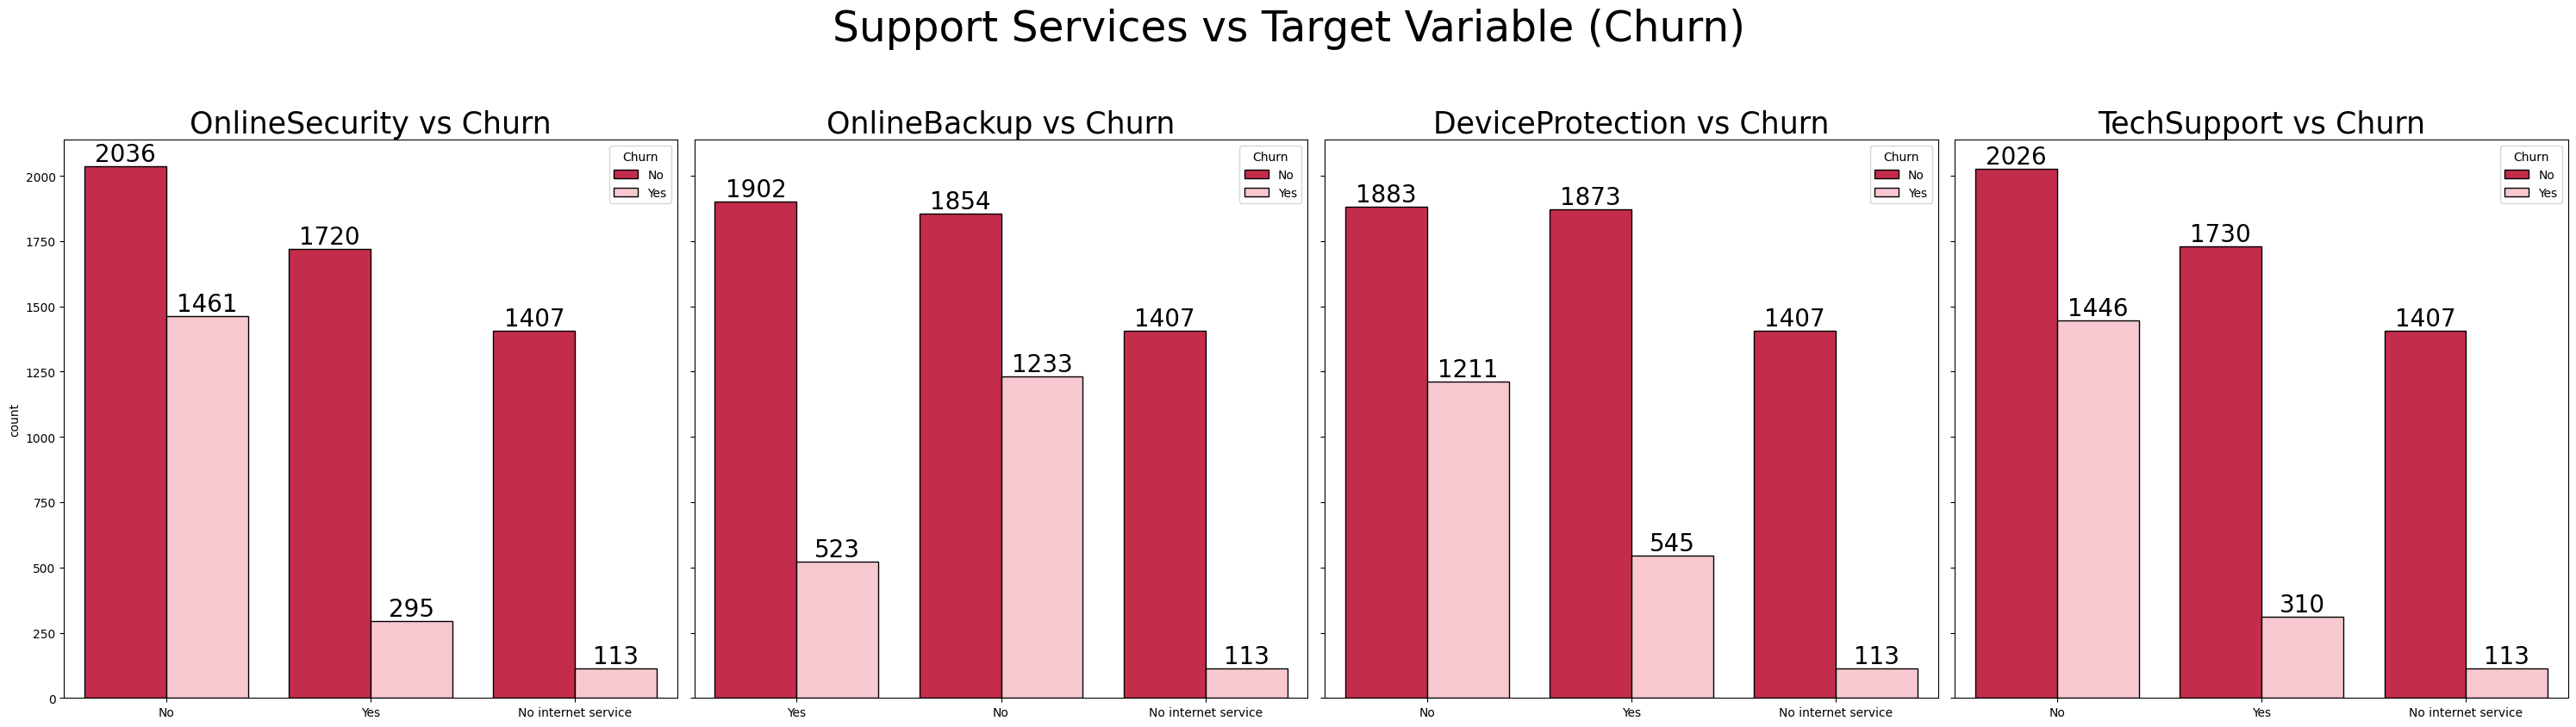

In [32]:
# List of service-related columns to visualize
list3 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Using the custom countplot function to plot these features
countplots_custom(
    dataset=df,                    # DataFrame to plot
    columns_list=list3,             # Columns to plot
    rows=1,                         # 1 row layout
    cols=4,                         # 4 columns layout (one for each feature)
    figsize=(30, 8),                # Size of the entire figure
    hue="Churn",                    # Hue based on Churn (Yes/No or 1/0)
    palette=palette,                # Color palette defined earlier
    suptitle='Support Services vs Target Variable (Churn)' # Super Title for the whole figure
)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [33]:
# ----------------------------------------------
# Calculating percentage values for Pie Charts 
# (Only for customers who have churned — Churn == 1)
# ----------------------------------------------

# OnlineSecurity feature
online_security = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
pie3_values1 = [
    online_security[0] / online_security.sum() * 100, 
    online_security[1] / online_security.sum() * 100,
    online_security[2] / online_security.sum() * 100
]

# OnlineBackup feature
online_backup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
pie3_values2 = [
    online_backup[0] / online_backup.sum() * 100, 
    online_backup[1] / online_backup.sum() * 100,
    online_backup[2] / online_backup.sum() * 100
]

# DeviceProtection feature
device_protection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
pie3_values3 = [
    device_protection[0] / device_protection.sum() * 100, 
    device_protection[1] / device_protection.sum() * 100,
    device_protection[2] / device_protection.sum() * 100
]

# TechSupport feature
tech_support = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
pie3_values4 = [
    tech_support[0] / tech_support.sum() * 100, 
    tech_support[1] / tech_support.sum() * 100,
    tech_support[2] / tech_support.sum() * 100
]


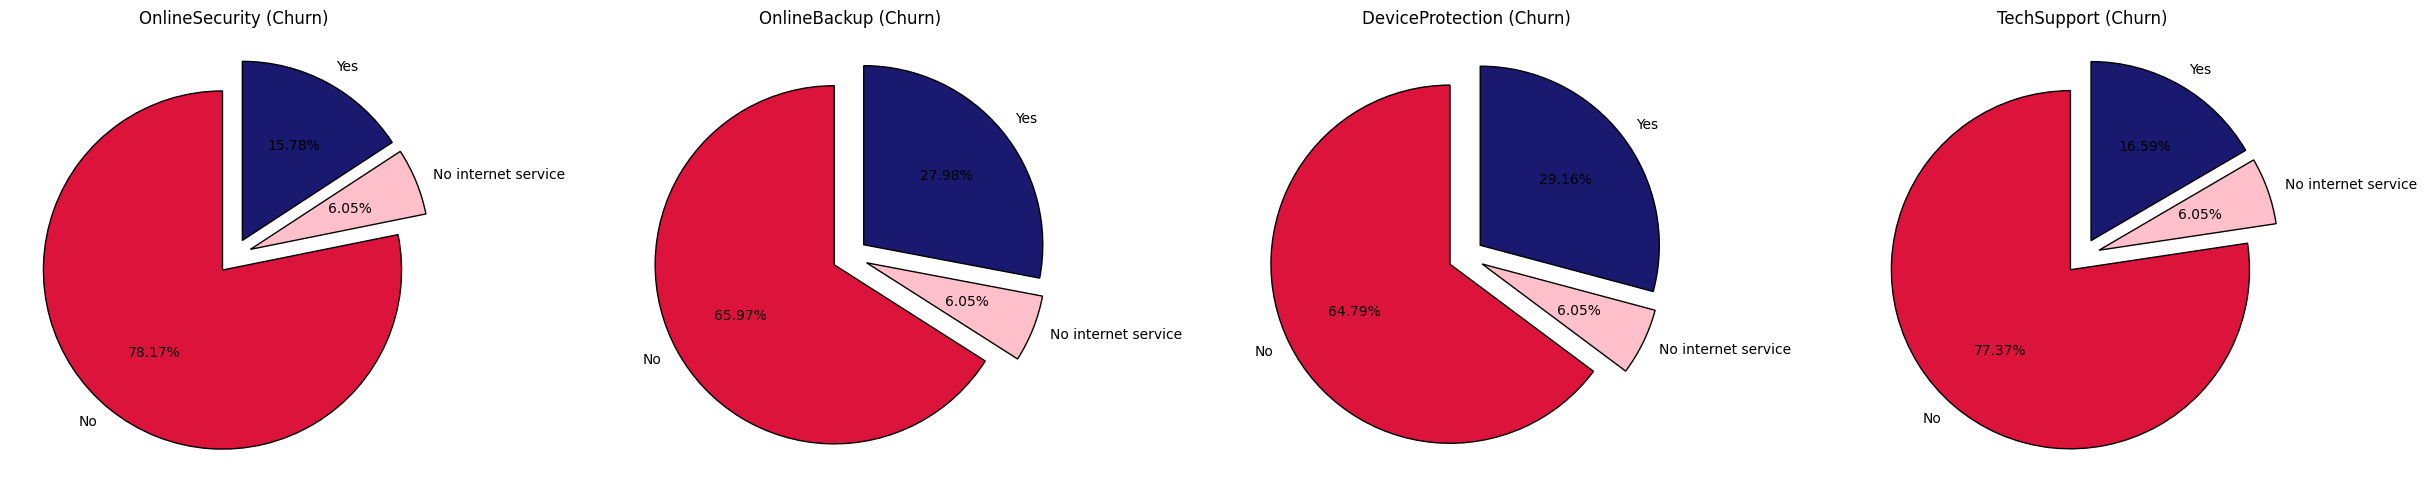

In [34]:
# ----------------------------------------------
# Plotting Pie Charts for Support Services vs Churn
# (Visualizing churn distribution for 4 service features)
# ----------------------------------------------

# Create a new figure with a custom size
fig = plt.figure(figsize=(25, 5))

# ---------------------- Plot 1: OnlineSecurity ----------------------
plt.subplot(1, 4, 1)  # 2 rows, 2 columns, 1st plot
plt.pie(
    pie3_values1,
    labels=['No', 'No internet service', 'Yes'],
    autopct='%1.2f%%',       # Format pie chart percentages
    startangle=90,           # Start from 90 degree for better look
    explode=(0.1, 0.1, 0.1),   # Slightly separate 'No' and 'Yes' slices
    colors=palette,          # Use predefined color palette
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}  # Stylish edges
)
plt.title('OnlineSecurity (Churn)')

# ---------------------- Plot 2: OnlineBackup ----------------------
plt.subplot(1, 4, 2)  # 2nd plot
plt.pie(
    pie3_values2,
    labels=['No', 'No internet service', 'Yes'],
    autopct='%1.2f%%',
    startangle=90,
    explode=(0.1, 0.1, 0.1),
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('OnlineBackup (Churn)')

# ---------------------- Plot 3: DeviceProtection ----------------------
plt.subplot(1, 4, 3)  # 3rd plot
plt.pie(
    pie3_values3,
    labels=['No', 'No internet service', 'Yes'],
    autopct='%1.2f%%',
    startangle=90,
    explode=(0.1, 0.1, 0.1),
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('DeviceProtection (Churn)')

# ---------------------- Plot 4: TechSupport ----------------------
plt.subplot(1, 4, 4)  # 4th plot

# Fixing the mistake you had: you repeated pie_values3 instead of pie_values4
plt.pie(
    pie3_values4,  # Corrected from pie_values3 to pie_values4
    labels=['No', 'No internet service', 'Yes'],
    autopct='%1.2f%%',
    startangle=90,
    explode=(0.1, 0.1, 0.1),
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('TechSupport (Churn)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Finally display the pie charts
plt.show()


### _4. Payments by Churn and not Churn_

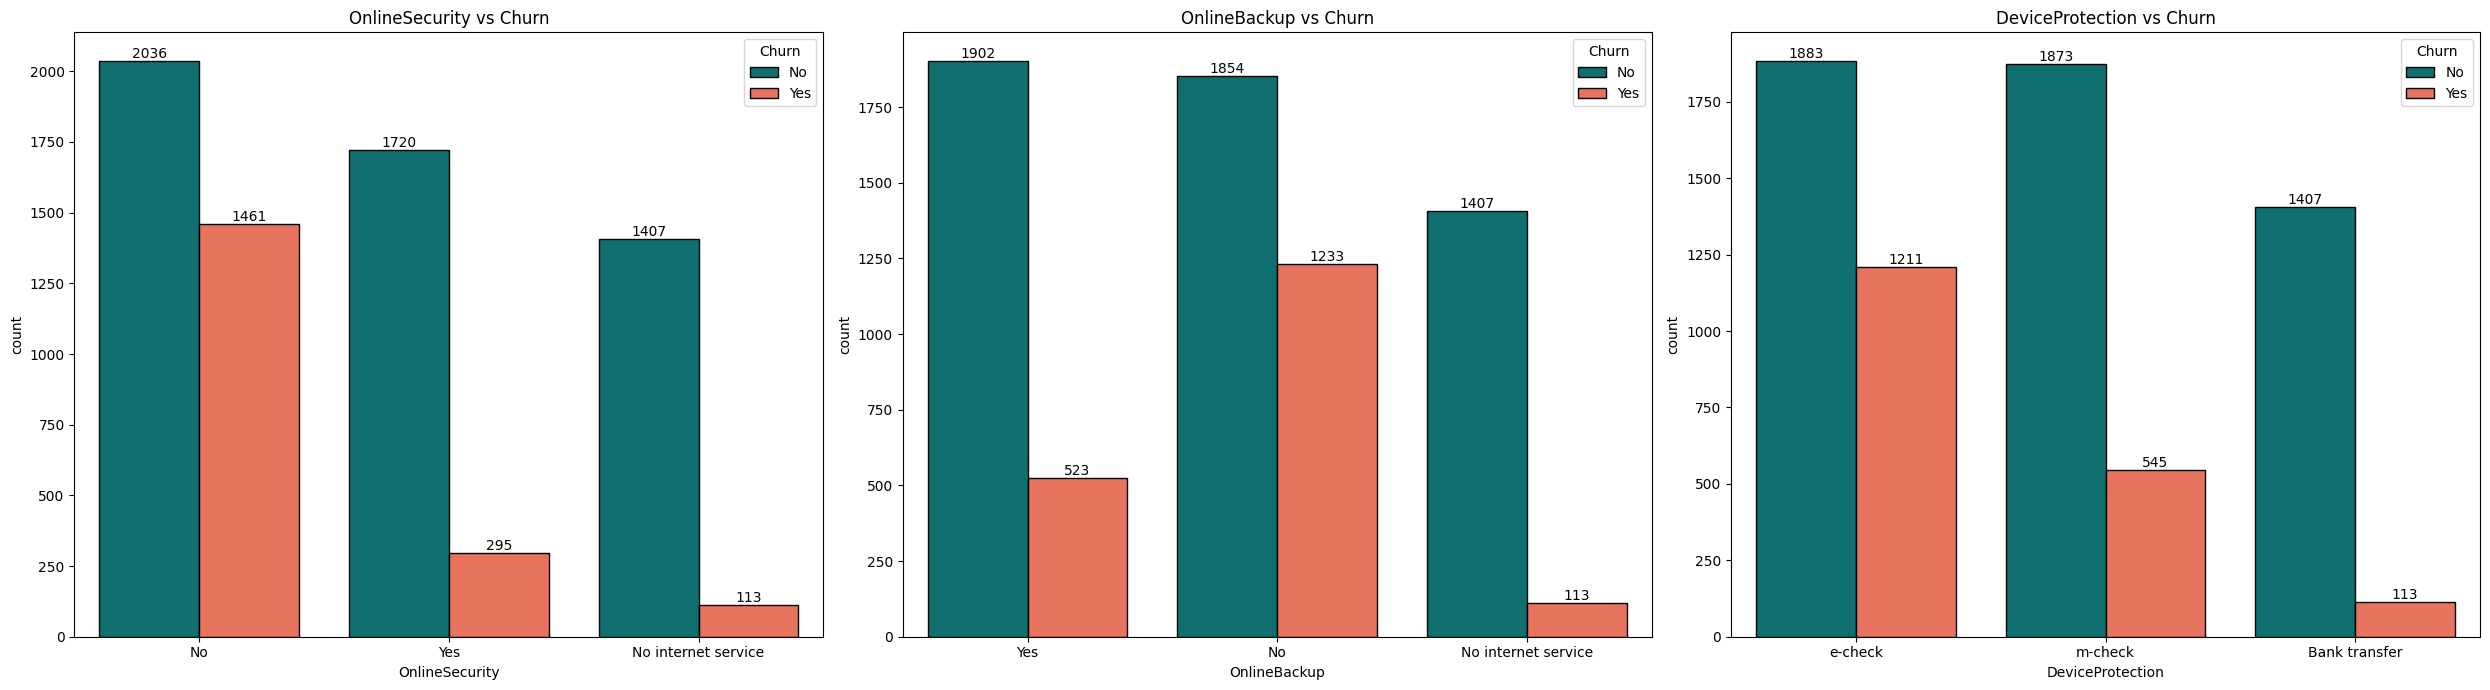

In [35]:
# ----------------------------------------------
# Plotting Countplots for Contract, PaperlessBilling, and PaymentMethod vs Churn
# ----------------------------------------------

# Create a figure with 1 row, 3 columns of plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# ---------------------- Plot 1: Contract vs Churn ----------------------
plt.subplot(1, 3, 1)
ax = sns.countplot(
    data=df,
    x=list3[0],               # 'Contract'
    hue="Churn",
    palette=palette2,
    edgecolor='black'
)
ax.legend(loc='upper right', title='Churn')  # Place legend at the upper right
for container in ax.containers:
    ax.bar_label(container)  # Add bar labels
plt.title(f"{list3[0]} vs Churn")  # Set dynamic title
#plt.xticks(rotation=15)  # Rotate x labels slightly for better visibility

# ---------------------- Plot 2: PaperlessBilling vs Churn ----------------------
plt.subplot(1, 3, 2)
ax = sns.countplot(
    data=df,
    x=list3[1],               # 'PaperlessBilling'
    hue="Churn",
    palette=palette2,
    edgecolor='black'
)
ax.legend(loc='upper right', title='Churn')  # Place legend at the lower left
for container in ax.containers:
    ax.bar_label(container)
plt.title(f"{list3[1]} vs Churn")

# ---------------------- Plot 3: PaymentMethod vs Churn ----------------------
plt.subplot(1, 3, 3)
ax = sns.countplot(
    data=df,
    x=list3[2],               # 'PaymentMethod'
    hue="Churn",
    palette=palette2,
    edgecolor='black'
)
ax.legend(loc='upper right', title='Churn')
for container in ax.containers:
    ax.bar_label(container)

# Manually set better x-tick labels for PaymentMethod (shorter labels)
ax.set_xticklabels(['e-check', 'm-check', 'Bank transfer', 'Credit card'])

plt.title(f"{list3[2]} vs Churn")

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the complete figure
plt.show()


In [36]:
# -----------------------------------------------------
# Calculating Pie Chart Values for Contract, PaperlessBilling, and PaymentMethod
# (Considering customers who churned only, i.e., Churn == 1)
# -----------------------------------------------------

# --- Contract Distribution (for churned customers) ---
contract_counts = df1[df1['Churn'] == 1]['Contract'].value_counts()
# Convert counts to percentages
pie4_values1 = [(count / contract_counts.sum()) * 100 for count in contract_counts]

# --- PaperlessBilling Distribution (for churned customers) ---
paperless_counts = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
pie4_values2 = [(count / paperless_counts.sum()) * 100 for count in paperless_counts]

# --- PaymentMethod Distribution (for churned customers) ---
payment_counts = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
pie4_values3 = [(count / payment_counts.sum()) * 100 for count in payment_counts]

# (Optional: rounding percentages to 2 decimal places for cleaner display)
pie_values1 = [round(val, 2) for val in pie4_values1]
pie_values2 = [round(val, 2) for val in pie4_values2]
pie_values3 = [round(val, 2) for val in pie4_values3]


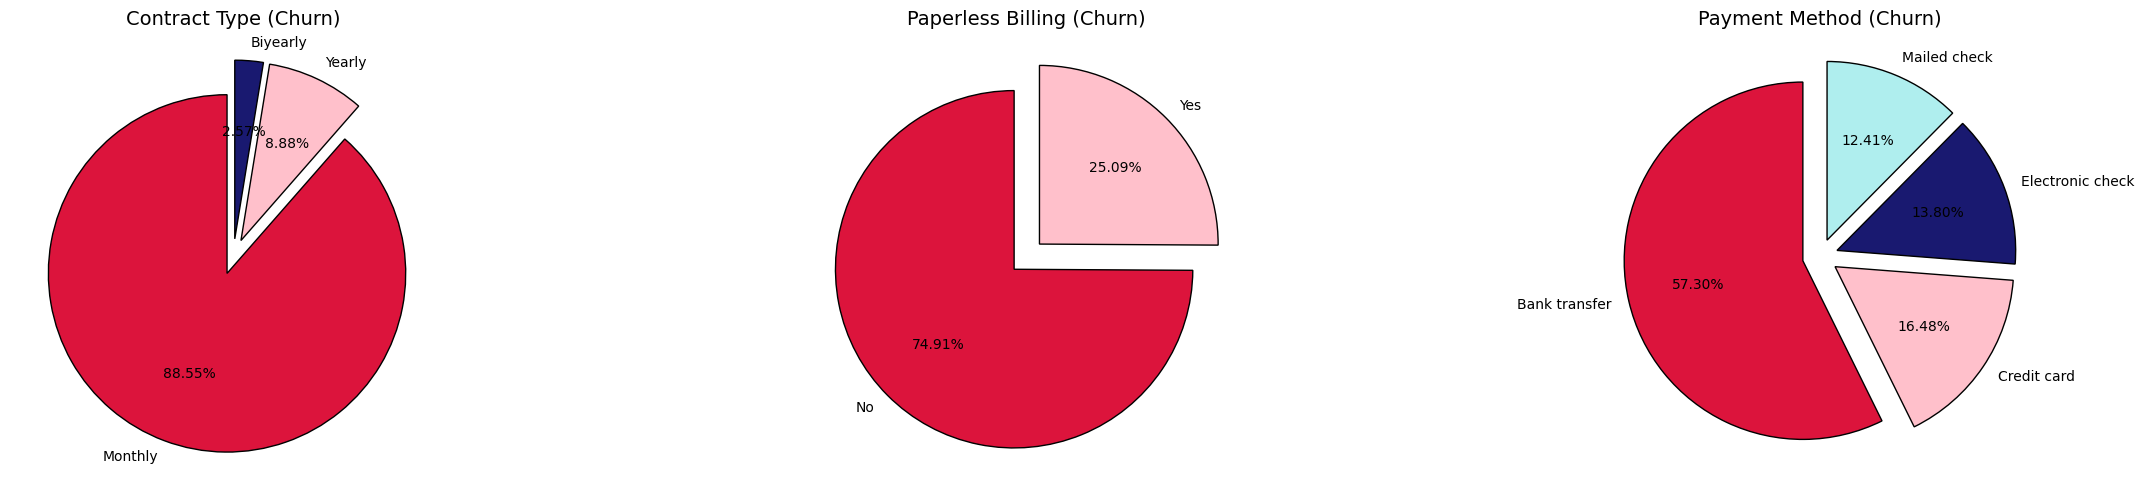

In [37]:
# ---------------------------------------------------
# Plotting Pie Charts for Contract, PaperlessBilling, and PaymentMethod (for Churned Customers)
# ---------------------------------------------------

# Create a figure with 1 row and 3 columns for subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))  # Increased width, smaller height for better layout

# --- Pie Chart for Contract ---
plt.subplot(1, 3, 1)  # 1st subplot
plt.pie(
    pie4_values1, 
    labels=['Monthly', 'Yearly', 'Biyearly'], 
    autopct='%1.2f%%', 
    startangle=90, 
    explode=(0.1, 0.1, 0.1), 
    colors=palette, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Contract Type (Churn)', fontsize=14)

# --- Pie Chart for Paperless Billing ---
plt.subplot(1, 3, 2)  # 2nd subplot
plt.pie(
    pie4_values2, 
    labels=['No', 'Yes'], 
    autopct='%1.2f%%', 
    startangle=90, 
    explode=(0.1, 0.1), 
    colors=palette, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Paperless Billing (Churn)', fontsize=14)

# --- Pie Chart for Payment Method ---
plt.subplot(1, 3, 3)  # 3rd subplot
plt.pie(
    pie4_values3, 
    labels=['Bank transfer', 'Credit card', 'Electronic check', 'Mailed check'], 
    autopct='%1.2f%%', 
    startangle=90, 
    explode=(0.1, 0.1, 0.1, 0.1),  # Emphasize some slices
    colors=palette, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Payment Method (Churn)', fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the full figure
plt.show()


## __Features Engineering__

### _1. Train test split - stratified splitting_

In [38]:
# Creating a copy of the original dataset to ensure original data remains unchanged
df3 = df.copy()

# Encoding the target variable 'Churn' using LabelEncoder
# This will convert 'Yes'/'No' into 1/0 respectively
df3['Churn'] = label.fit_transform(df3['Churn'])

# Separating features (X) and target variable (y)
X = df3.drop(columns=["Churn", "customerID"])  # X contains all columns except 'Churn' and 'customerID'
y = df3['Churn']               # y contains only the 'Churn' column (the label we want to predict)


In [39]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# Stratify=y ensures that the proportion of classes (0 and 1) remains the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y,          # Maintain the same class distribution in train and test
    test_size=0.25,      # 25% data for testing, 75% for training
    random_state=42      # Ensures reproducibility of results
)


### _2. Features scaling_

In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Fit the scaler on the training data (only numeric columns) and transform the training data
X_train[numeric_columns] = standard_scaler.fit_transform(X_train[numeric_columns])

# Transform the testing data using the scaler fitted on the training data
X_test[numeric_columns] = standard_scaler.transform(X_test[numeric_columns])


In [41]:
print(categoric_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Create a Column Transformer that applies OneHotEncoding to multiple categorical columns
transformer = make_column_transformer(
    (
        OneHotEncoder(handle_unknown='ignore'),  # Encode categories, ignore unseen categories during transform
        [
            'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
            'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod'
        ]
    )
)


In [43]:
# Transform the X_train data using the OneHotEncoder transformer
transformed = transformer.fit_transform(X_train)

# Convert the transformed array back into a DataFrame
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

# Restore the original index (because transformation loses it)
transformed_df.index = X_train.index

# Concatenate the original X_train (numerical columns) with the new OneHotEncoded columns
X_train = pd.concat([X_train, transformed_df], axis=1)

# Drop the original categorical columns from X_train (they are now encoded)
X_train.drop(categoric_columns, axis=1, inplace=True)


In [44]:
# Transform the X_test data using the fitted OneHotEncoder transformer
transformed = transformer.transform(X_test)

# Convert the transformed array back into a DataFrame
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

# Restore the original index (because transformation removes it)
transformed_df.index = X_test.index

# Concatenate the original X_test (numerical columns) with the new OneHotEncoded columns
X_test = pd.concat([X_test, transformed_df], axis=1)

# Drop the original categorical columns from X_test (they are now encoded)
X_test.drop(categoric_columns, axis=1, inplace=True)


In [45]:
print(X_train.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'onehotencoder__gender_Female',
       'onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_0',
       'onehotencoder__SeniorCitizen_1', 'onehotencoder__Partner_No',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_No',
       'onehotencoder__Dependents_Yes', 'onehotencoder__PhoneService_No',
       'onehotencoder__PhoneService_Yes', 'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes

In [46]:
# Setting new feature names

X_train.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges','NumAdminTickets',
       'NumTechTickets',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']


X_test.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges','NumAdminTickets',
       'NumTechTickets',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

# After renaming the columns
X_train.head(5)


,Tenure,MonthlyCharges,TotalCharges,NumAdminTickets,NumTechTickets,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
3687,-0.550434,1.162877,-0.179659,-0.413557,-0.338924,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5553,-1.283779,-0.305269,-0.984606,1.892860,-0.338924,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6870,0.671808,0.321096,0.624738,-0.413557,-0.338924,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1874,0.427360,0.713817,0.560688,-0.413557,-0.338924,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
147,-1.283779,-0.638336,-0.989019,-0.413557,-0.338924,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## __Modeling__

In [47]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


### _1. Over Sampling_

In [48]:
# Importing RandomOverSampler from imbalanced-learn library
# This is used to handle imbalanced datasets by performing oversampling.

from imblearn.over_sampling import RandomOverSampler

# Define the oversampling strategy using RandomOverSampler
# The `random_state=42` ensures that the process is reproducible
ros = RandomOverSampler(random_state=42)

# Fit the RandomOverSampler on the training data and apply the transformation
# This will resample the training set to make the class distribution more balanced
X_train, y_train = ros.fit_resample(X_train, y_train)


In [49]:
# Displaying the distribution of classes after applying RandomOverSampler

# Printing the count and percentage of Genuine (Non-Churned) customers
print('Genuine:', y_train.value_counts()[0], '/', 
      round(y_train.value_counts()[0] / len(y_train) * 100, 2), '% of the dataset')

# Printing the count and percentage of Frauds (Churned) customers
print('Frauds:', y_train.value_counts()[1], '/', 
      round(y_train.value_counts()[1] / len(y_train) * 100, 2), '% of the dataset')


Genuine: 3872 / 50.0 % of the dataset
Frauds: 3872 / 50.0 % of the dataset


### _2. Feature Importance_

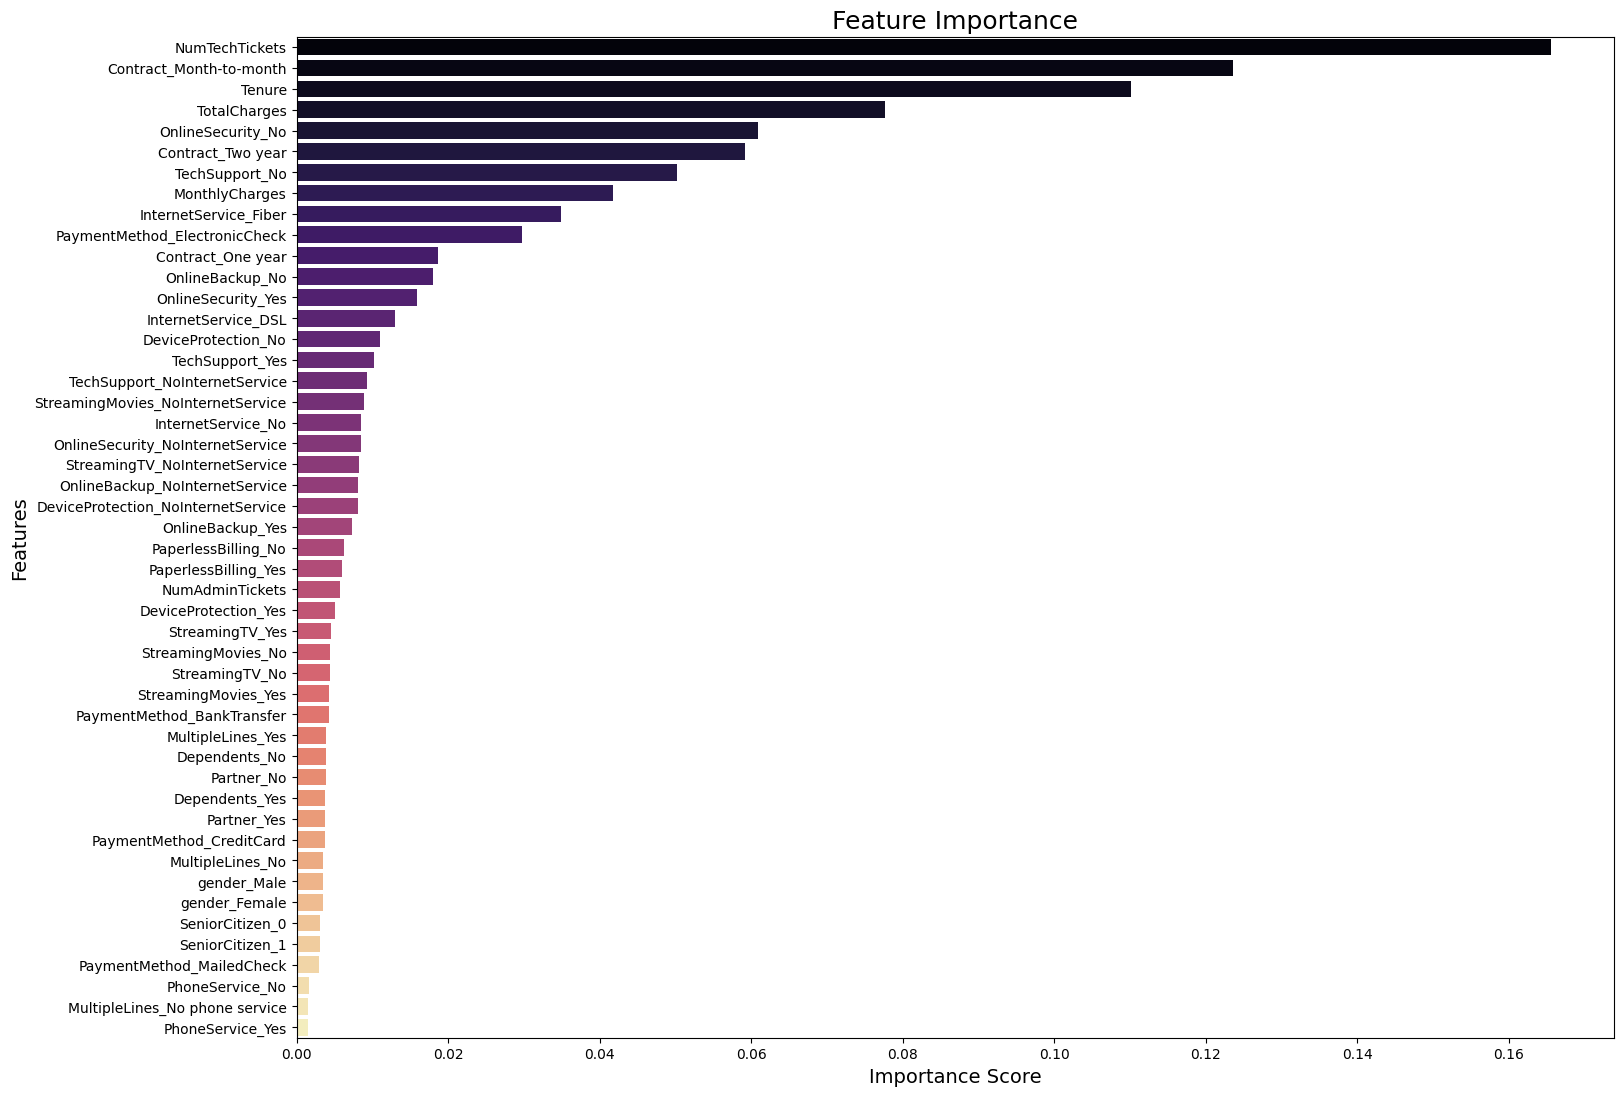

In [50]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

# Initializing the Random Forest model with specific hyperparameters
clf = RandomForestClassifier(
    max_depth=8,             # Limit maximum depth of the tree to avoid overfitting
    min_samples_leaf=3,      # Minimum samples required at a leaf node
    min_samples_split=3,     # Minimum samples required to split an internal node
    n_estimators=5000,       # Number of trees in the forest
    random_state=13          # Random state for reproducibility
)

# Training the Random Forest model
clf = clf.fit(X_train, y_train)

# Getting feature importances from the trained model
fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(17, 13))
plt.title("Feature Importance", fontsize=18)
ax = sns.barplot(y=fimp.index, x=fimp.values, palette="magma", orient='h')  # Horizontal barplot
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()


### _3. Random Forest_

In [51]:
# ================== Random Forest Model - Training and Prediction =================

# Creating the Random Forest model object with a fixed random state (for reproducibility)
rf = RandomForestClassifier(random_state=13)

# Fitting (training) the model on the training dataset
rf.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred = rf.predict(X_test)


In [52]:
# Calculating evaluation metrics

rf_Recall = recall_score(y_test, y_pred)            # How many actual churns were correctly predicted
rf_Precision = precision_score(y_test, y_pred)       # How many predicted churns were actually churn
rf_f1 = f1_score(y_test, y_pred)                     # Harmonic mean of precision and recall
rf_accuracy = accuracy_score(y_test, y_pred)         # Overall percentage of correct predictions
rf_roc_auc = roc_auc_score(y_test, y_pred)            # Area under ROC curve (binary classification metric)


In [53]:
# =========== Confusion Matrix ==============

# Importing confusion matrix
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1144  147]
 [ 142  325]]


Interpretation:

- 1142 → True Negatives (correctly predicted 'No churn')
- 149 → False Positives (wrongly predicted churn when customer did not churn) 
- 143 → False Negatives (missed predicting churn when customer actually churned)
- 324 → True Positives (correctly predicted churn)

In [54]:
# =============== Full Classification Report ==============

# Importing classification_report
from sklearn.metrics import classification_report

# Printing precision, recall, f1-score for each class (0 and 1)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1291
           1       0.69      0.70      0.69       467

    accuracy                           0.84      1758
   macro avg       0.79      0.79      0.79      1758
weighted avg       0.84      0.84      0.84      1758



Interpretation:

- Model is good at predicting Class 0 (non-churn).
- Predicting Class 1 (churn) is moderate (recall ~ 69% for churn customers).

##### _K Fold Cross Validation (RECALL Focused)_

In [55]:
# Importing cross_val_score for K-Fold validation
from sklearn.model_selection import cross_val_score
from statistics import stdev

# Performing 5-fold cross-validation based on 'recall' score
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall', error_score="raise")

# Storing the mean and standard deviation of cross-validation recall scores
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)

# Printing cross-validation results
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)


Cross Validation Recall scores are: [0.95096774 0.94967742 1.         1.         0.99870801]
Average Cross Validation Recall score:  0.979870634325248
Cross Validation Recall standard deviation:  0.026982572517491452


In [56]:
# =============== Saving All Scores in a DataFrame =================

# Creating a list of all the important metrics
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy, rf_roc_auc, rf_cv_score, rf_cv_stdev)]

# Creating a DataFrame with labeled columns
rf_score = pd.DataFrame(data = ndf, 
                        columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])

# Inserting model name as the first column
rf_score.insert(0, 'Model', 'Random Forest')

# Displaying the final scores
rf_score


,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.695931,0.688559,0.692226,0.835609,0.791033,0.979871,0.026983


#### _Hyperparameter Tuning Using GridSearchCV_

In [57]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid to search
params = {
    'n_estimators': [130],            # Number of trees in the forest
    # (Usually we would test: [120, 130, 150, 170, 190, 200])
    
    'max_depth': [14],                # Maximum depth of each tree
    # (Can also try: [8, 10, 12, 14, 15])
    
    'min_samples_split': [3],         # Minimum samples needed to split a node
    # (Typical values to try: [3, 4, 5, 6])
    
    'min_samples_leaf': [2],          # Minimum samples required at each leaf node
    # (Usually values like: [1, 2, 3])
    
    'random_state': [13]              # Ensuring reproducibility
}

# Initializing GridSearchCV
grid_rf = GridSearchCV(
    estimator=rf,            # The base RandomForest model
    param_grid=params,       # Parameter grid to search
    cv=5,                    # 5-fold cross-validation
    scoring='recall'         # Optimize for recall (catching churn cases)
)

# Fitting the model on training data
grid_rf = grid_rf.fit(X_train, y_train)


In [58]:
# ============ Best Parameters and Best Cross-Validation Score ==============
# Printing best combination of hyperparameters found by GridSearchCV
print('Best parameters:', grid_rf.best_params_)

# Printing best cross-validation recall score achieved during search
print('Best score:', grid_rf.best_score_)


Best parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 130, 'random_state': 13}
Best score: 0.9594672001333666


In [59]:
# ================= Predict on Test Set and Evaluate ================

# Making predictions using the best tuned model
y_pred = grid_rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating evaluation metrics
grid_rf_Recall = recall_score(y_test, y_pred)
grid_rf_Precision = precision_score(y_test, y_pred)
grid_rf_f1 = f1_score(y_test, y_pred)
grid_rf_accuracy = accuracy_score(y_test, y_pred)
grid_roc_auc = roc_auc_score(y_test, y_pred)

# Printing the confusion matrix
print(cm)


[[1100  191]
 [  95  372]]


Interpretation:

- 1100 → True Negatives
- 191 → False Positives
- 95 → False Negatives
- 372 → True Positives

In [60]:
# =========== Full Classification Report ===================

# Importing classification_report
from sklearn.metrics import classification_report

# Printing detailed precision, recall, f1-score for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1291
           1       0.66      0.80      0.72       467

    accuracy                           0.84      1758
   macro avg       0.79      0.82      0.80      1758
weighted avg       0.85      0.84      0.84      1758



Interpretation:

- Recall for churn (Class 1) improved to 80% after tuning.
- Overall accuracy = 84%.
- Model better catches churn cases compared to earlier.

#### _Cross Validation Again on Tuned Model (5-Fold)_

In [61]:
# Performing cross-validation again using tuned model
from sklearn.model_selection import cross_val_score
from statistics import stdev

# Getting 5-fold cross-validation recall scores
score2 = cross_val_score(grid_rf, X_train, y_train, cv=5, scoring='recall')

# Calculating mean and standard deviation of recall scores
grid_cv_score = score2.mean()
grid_cv_stdev = stdev(score2)

# Printing the cross-validation results
print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)


Cross Validation Recall scores are: [0.92387097 0.93806452 0.9754522  0.9754522  0.98449612]
Average Cross Validation Recall score:  0.9594672001333666
Cross Validation Recall standard deviation:  0.0267518872450765


In [62]:
# ================= Save the Tuned Model Results in a DataFrame =====================

# Storing the tuned model scores
ndf2 = [(grid_rf_Recall, grid_rf_Precision, grid_rf_f1, grid_rf_accuracy, grid_roc_auc, grid_cv_score, grid_cv_stdev)]

# Creating a DataFrame to organize the results
grid_rf_score = pd.DataFrame(data = ndf2, columns=
                          ['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])

# Inserting model name
grid_rf_score.insert(0, 'Model', 'Random Forest after tuning')

# Displaying the final DataFrame
grid_rf_score


,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest after tuning,0.796574,0.660746,0.72233,0.837315,0.824313,0.959467,0.026752


### _4. XGBoost_

In [63]:
# Import necessary libraries
from xgboost import XGBClassifier

# Step 1: Initialize XGBoost Classifier
XGBC = XGBClassifier()

# Step 2: Train/Fit the model on training data
XGBC.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [64]:
# Step 3: Predict the target on the test set
y_pred = XGBC.predict(X_test)

# Step 4: Evaluate model performance
XGBC_Recall = recall_score(y_test, y_pred)
XGBC_Precision = precision_score(y_test, y_pred)
XGBC_f1 = f1_score(y_test, y_pred)
XGBC_accuracy = accuracy_score(y_test, y_pred)
XGBC_roc_auc = roc_auc_score(y_test, y_pred)

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1111  180]
 [  99  368]]


Interpretation:

- 1111 → True Negatives
- 180 → False Positives
- 99 → False Negatives
- 368 → True Positives

#### _K-Fold Cross Validation for XGBoost_

In [65]:
# Step 6: Perform 5-Fold Cross-Validation based on Recall
score = cross_val_score(XGBC, X_train, y_train, cv=5, scoring='recall')

# Step 7: Calculate mean and standard deviation of cross-validation recall scores
XGBC_cv_score = score.mean()
XGBC_cv_stdev = stdev(score)

print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score:', XGBC_cv_score)
print('Cross Validation Recall standard deviation:', XGBC_cv_stdev)


Cross Validation Recall scores are: [0.94967742 0.9483871  0.98191214 0.98062016 0.98837209]
Average Cross Validation Recall score: 0.9697937817787781
Cross Validation Recall standard deviation: 0.01918419223395431


In [66]:
# ================ Save Results into a Table =========================

# Step 8: Create a summary dataframe for XGBoost initial results
ndf = [(XGBC_Recall, XGBC_Precision, XGBC_f1, XGBC_accuracy, XGBC_roc_auc, XGBC_cv_score, XGBC_cv_stdev)]
XGBC_score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
XGBC_score.insert(0, 'Model', 'XGBC')

XGBC_score


,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,XGBC,0.788009,0.671533,0.725123,0.841297,0.824291,0.969794,0.019184


#### _Hyperparameter Tuning for XGBoost using GridSearchCV_

In [67]:
# Step 1 - Tune learning_rate, n_estimators, subsample, colsample_bytree

# Define parameter grid
params = {
    'learning_rate': [0.01],     # small learning rate to boost slowly
    'subsample': [0.8],           # use 80% of the data for each tree
    'colsample_bytree': [0.8],    # use 80% of features per tree
    'n_estimators': [450]         # number of trees
}

# Perform GridSearchCV with 5-fold cross-validation
grid_xgb = GridSearchCV(XGBC, param_grid=params, cv=5, scoring='recall')
grid_xgb.fit(X_train, y_train)

# Best Parameters after 1st tuning
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.9230434275235474


In [68]:
# Step 2 - Further Tune max_depth and min_child_weight

# Define new parameter grid including max_depth and min_child_weight
params = {
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'n_estimators': [450],
    'max_depth': [7],             # controlling tree depth
    'min_child_weight': [5]       # minimum sum of instance weight in a child
}

# Perform second round of GridSearchCV
grid_xgb = GridSearchCV(XGBC, param_grid=params, cv=5, scoring='recall')
grid_xgb.fit(X_train, y_train)

# Best Parameters after full tuning
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.9204604484454446


In [69]:
# ================ Predict and Evaluate Tuned Model ==================
# Step 9: Predict using Tuned XGBoost
y_pred = grid_xgb.predict(X_test)

# Step 10: Calculate performance metrics
grid_xgb_Recall = recall_score(y_test, y_pred)
grid_xgb_Precision = precision_score(y_test, y_pred)
grid_xgb_f1 = f1_score(y_test, y_pred)
grid_xgb_accuracy = accuracy_score(y_test, y_pred)
grid_xgb_roc_auc = roc_auc_score(y_test, y_pred)

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix after tuning:\n", cm)

Confusion Matrix after tuning:
 [[1067  224]
 [  68  399]]


Interpretation:

- 1067 → True Negatives
- 224 → False Positives
- 68 → False Negatives
- 399 → True Positives

#### _K-Fold Cross Validation for Tuned XGBoost_

In [70]:
# Step 12: Perform 5-Fold CV again after tuning
score = cross_val_score(grid_xgb, X_train, y_train, cv=5, scoring='recall')

# Step 13: Calculate mean and std deviation
grid_xgb_cv_score = score.mean()
grid_xgb_cv_stdev = stdev(score)

print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score:', grid_xgb_cv_score)
print('Cross Validation Recall standard deviation:', grid_xgb_cv_stdev)


Cross Validation Recall scores are: [0.90709677 0.91096774 0.92635659 0.91860465 0.93927649]
Average Cross Validation Recall score: 0.9204604484454446
Cross Validation Recall standard deviation: 0.012854483521382618


In [71]:
# ================ Save Tuned Model Results into a Table =================

# Step 14: Create a summary dataframe for Tuned XGBoost
ndf = [(grid_xgb_Recall, grid_xgb_Precision, grid_xgb_f1, grid_xgb_accuracy, grid_xgb_roc_auc, grid_xgb_cv_score, grid_xgb_cv_stdev)]
grid_xgb_score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_xgb_score.insert(0, 'Model', 'Tuned XGBC')

grid_xgb_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Tuned XGBC,0.85439,0.640449,0.73211,0.833902,0.84044,0.92046,0.012854


### _5. Voting Clasifier_

In [72]:
# Import Library
from sklearn.ensemble import VotingClassifier

In [73]:
# Step 1: Create Base Models
# Creating a list to store the individual models for the ensemble
estimators = []   # In Voting Classifier, **`estimators`** are the list of individual models whose predictions are combined to make the final ensemble decision.

# Adding Random Forest Classifier with tuned hyperparameters
estimators.append(('RandomForest', RandomForestClassifier(
    max_depth=10,             # Maximum depth of each tree
    min_samples_leaf=1,       # Minimum samples required at a leaf node
    min_samples_split=3,      # Minimum number of samples required to split an internal node
    n_estimators=170,         # Number of trees in the forest
    random_state=13           # Random seed for reproducibility
)))

# Adding XGBoost Classifier
estimators.append(('XGB', XGBClassifier(
    random_state=13           # Random seed for reproducibility
)))


In [74]:
# Step 2: Create and Train Voting Classifier (Hard Voting)
# Initializing the Voting Classifier with 'hard' voting
# Hard Voting: Majority class prediction among the base models
VC_hard = VotingClassifier(estimators=estimators, voting='hard')

# Training the Voting Classifier on the training data
VC_hard.fit(X_train, y_train)

# Predicting the target on the test set
y_pred = VC_hard.predict(X_test)

In [75]:
# Step 3: Evaluate the Model Performance
# Calculating evaluation metrics
VC_hard_Recall = recall_score(y_test, y_pred)
VC_hard_Precision = precision_score(y_test, y_pred)
VC_hard_f1 = f1_score(y_test, y_pred)
VC_hard_accuracy = accuracy_score(y_test, y_pred)
VC_hard_roc_auc = roc_auc_score(y_test, y_pred)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
print(cm)

[[1134  157]
 [ 120  347]]


Interpretation:

- 1134 → True Negatives
- 157 → False Positives
- 120 → False Negatives
- 347 → True Positives

In [76]:
# Step 4: Perform K-Fold Cross Validation (5-Folds)
# Performing 5-Fold Cross Validation with 'recall' as the scoring metric
score = cross_val_score(VC_hard, X_train, y_train, cv=5, scoring='recall', error_score="raise")

# Calculating average recall and standard deviation across folds
VC_hard_cv_score = score.mean()
VC_hard_cv_stdev = stdev(score)

# Displaying Cross Validation results
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', VC_hard_cv_score)
print('Cross Validation Recall standard deviation: ', VC_hard_cv_stdev)

Cross Validation Recall scores are: [0.91354839 0.92516129 0.95478036 0.95865633 0.96511628]
Average Cross Validation Recall score:  0.9434525297991165
Cross Validation Recall standard deviation:  0.0226805013448477


In [77]:
# Step 5: Store the Results in a DataFrame
# Storing all the important evaluation metrics into a structured DataFrame
ndf = [(VC_hard_Recall, VC_hard_Precision, VC_hard_f1, VC_hard_accuracy, VC_hard_roc_auc, VC_hard_cv_score, VC_hard_cv_stdev)]

# Creating a DataFrame
VC_hard_score = pd.DataFrame(
    data=ndf,
    columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall']
)

# Inserting a column for Model Name
VC_hard_score.insert(0, 'Model', 'Voting Classifier - Hard Voting')

# Displaying the results
VC_hard_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Voting Classifier - Hard Voting,0.743041,0.688492,0.714727,0.842435,0.810715,0.943453,0.022681


### _6. Result Comparision_

In [78]:
# Step 1: Combining all model evaluation results into a single DataFrame

# Here, rf_score, grid_score, XGBC_score, grid_xgb_score, and VC_hard_score
# are DataFrames created earlier for:
# - Random Forest (rf_score)
# - Tuned Random Forest (grid_score)
# - XGBoost (XGBC_score)
# - Tuned XGBoost (grid_xgb_score)
# - Voting Classifier (VC_hard_score)

# Using pd.concat() to vertically stack all these DataFrames
predictions = pd.concat(
    [rf_score, grid_rf_score, XGBC_score, grid_xgb_score, VC_hard_score], 
    ignore_index=True,   # Ignore original index and create a new continuous index
    sort=False           # Do not sort the columns alphabetically, keep original column order
)


In [79]:
# Sorting the combined DataFrame based on 'Avg CV Recall' in descending order
# Higher 'Avg CV Recall' means better consistent recall performance across cross-validation folds

predictions = predictions.sort_values(
    by=['Avg CV Recall'],   # Sort based on this column
    ascending=False         # Higher Avg CV Recall should come first
)

# Display the final sorted comparison table
predictions


,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.695931,0.688559,0.692226,0.835609,0.791033,0.979871,0.026983
2,XGBC,0.788009,0.671533,0.725123,0.841297,0.824291,0.969794,0.019184
1,Random Forest after tuning,0.796574,0.660746,0.722330,0.837315,0.824313,0.959467,0.026752
4,Voting Classifier - Hard Voting,0.743041,0.688492,0.714727,0.842435,0.810715,0.943453,0.022681
3,Tuned XGBC,0.854390,0.640449,0.732110,0.833902,0.840440,0.920460,0.012854


### _7. AUC-ROC Curve for the Best Model (grid_xgb)_

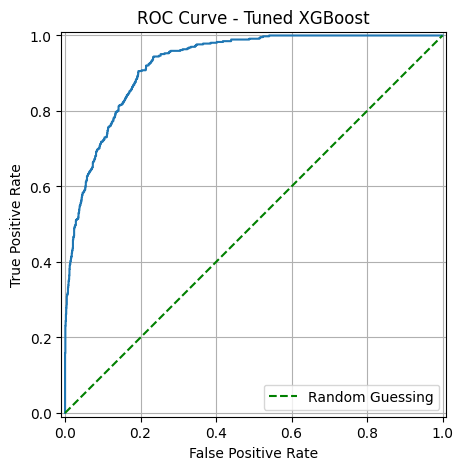

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay

# 1. Get the predicted probabilities from the model
# -------------------------------------------------
# grid_xgb.predict_proba(X_test) returns probability for both classes [0, 1]
# [:, 1] selects the probability of the positive class (churn = 1)
y_proba = grid_xgb.predict_proba(X_test)

# 2. Define a function to plot the ROC curve
# ------------------------------------------
def plot_auc_roc_curve(y_test, y_pred_prob):
    """
    Plots the AUC-ROC curve.
    
    y_test: True labels
    y_pred_prob: Predicted probability scores for the positive class
    """
    # Calculate False Positive Rate and True Positive Rate at different thresholds
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Create a ROC curve plot
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

    # Set the figure size for better clarity
    roc_display.figure_.set_size_inches(5, 5)

    # Plot a diagonal line representing random guessing
    plt.plot([0, 1], [0, 1], color='g', linestyle='--', label='Random Guessing')

    # Add title and legend
    plt.title('ROC Curve - Tuned XGBoost')
    plt.legend()
    plt.grid()

# 3. Call the function using the probability of class 1
# -----------------------------------------------------
plot_auc_roc_curve(y_test, y_proba[:, 1])


### _8. Precision-Recall (PR) Curve for the Best Model (grid_xgb)_

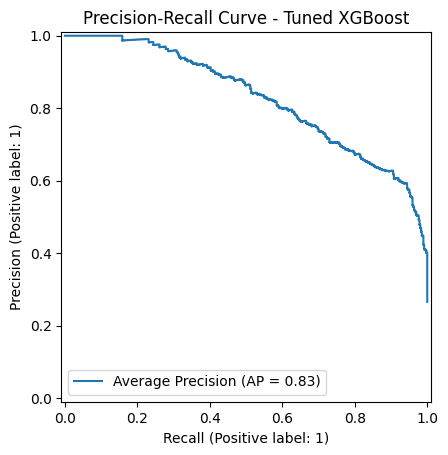

In [81]:
from sklearn.metrics import PrecisionRecallDisplay

# 1. Create and plot the Precision-Recall Curve directly from the estimator
# -------------------------------------------------------------------------
# PrecisionRecallDisplay.from_estimator automatically:
# - calls predict_proba internally
# - calculates precision and recall
# - plots the curve
display = PrecisionRecallDisplay.from_estimator(
    grid_xgb,         # the trained model
    X_test,           # features of the test set
    y_test,           # true labels
    name="Average Precision"  # name shown in the plot legend
)

# 2. Set title of the plot manually
# ----------------------------------
_ = display.ax_.set_title("Precision-Recall Curve - Tuned XGBoost")


## __Extract Final CSV File with Predicted Churn__

In [ ]:
# 1. Recover the original X_test part from the clean dataset (including 'customerID')
# -----------------------------------------------------------------------------------
# Separate features and target from the original df (without encoding)
X = df.drop(columns=["Churn"])  # Keep 'customerID' here
y = df['Churn']

# Use the exact same train_test_split settings to recover the same test rows
_, X_test_original, _, y_test_original = train_test_split(
    X, y,
    stratify=y,         # Maintain churn proportion in test set
    test_size=0.25,     # 25% test set
    random_state=42     # Same random seed to match earlier split
)

# 2. Make a copy of the recovered X_test
# --------------------------------------
X_test_final = X_test_original.copy()

# 3. Add 'Actual Churn' column to X_test_final
# --------------------------------------------
X_test_final['Actual Churn'] = y_test_original.values

# 4. Decode y_pred (model predictions) back to 'Yes'/'No' labels and add 'Predicted Churn'
# -----------------------------------------------------------------------------------------
# Initialize a fresh LabelEncoder for decoding predictions
label = LabelEncoder()
label.fit(['No', 'Yes'])  # Based on original 'Churn' classes

# Decode predicted 0/1 into 'No'/'Yes'
y_pred_labels = label.inverse_transform(y_pred)

# Add 'Predicted Churn' column
X_test_final['Predicted Churn'] = y_pred_labels

# 4.1 Add churn probability values (model confidence score for class 'Yes')
# -------------------------------------------------------------------------
# This shows the model's confidence level for churn (between 0 and 1)
churn_probabilities = y_proba[:, 1]
X_test_final['Churn Probability'] = churn_probabilities.round(4)  # Rounded for clarity

# 5. (Optional but recommended) Reorder columns to keep 'customerID' first
# ------------------------------------------------------------------------
cols = ['customerID'] + [col for col in X_test_final.columns if col != 'customerID']
X_test_final = X_test_final[cols]

# 6. Save the final clean dataset to CSV for Power BI
# ---------------------------------------------------
X_test_final.to_csv('final_powerbi_churn_data.csv', index=False)

# print("CSV file 'final_powerbi_churn_data.csv' created successfully and is ready for Power BI!")
